In [1]:
#!pip install lightgbm==3.3.2

In [2]:
#!pip install xgboost==1.5.0

  Obtaining dependency information for xgboost==1.5.0 from https://files.pythonhosted.org/packages/a2/8a/dbfcab37ea93951fa85e5746de0fc7378b2a4c99a32ddad36a7fb504ed57/xgboost-1.5.0-py3-none-win_amd64.whl.metadata
  Using cached xgboost-1.5.0-py3-none-win_amd64.whl.metadata (1.7 kB)
   ---------------------------------------- 0.0/106.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/106.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/106.6 MB 330.3 kB/s eta 0:05:23
   ---------------------------------------- 0.0/106.6 MB 330.3 kB/s eta 0:05:23
   ---------------------------------------- 0.0/106.6 MB 178.6 kB/s eta 0:09:57
   ---------------------------------------- 0.1/106.6 MB 281.8 kB/s eta 0:06:18
   ---------------------------------------- 0.1/106.6 MB 350.1 kB/s eta 0:05:05
   ---------------------------------------- 0.1/106.6 MB 350.1 kB/s eta 0:05:05
   ---------------------------------------- 0.1/106.6 MB 298.5 kB/s eta 0:05:57
   -------------

In [12]:
#!pip install hyperopt

  Obtaining dependency information for hyperopt from https://files.pythonhosted.org/packages/b6/cd/5b3334d39276067f54618ce0d0b48ed69d91352fbf137468c7095170d0e5/hyperopt-0.2.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for py4j from https://files.pythonhosted.org/packages/10/30/a58b32568f1623aaad7db22aa9eafc4c6c194b429ff35bdc55ca2726da47/py4j-0.10.9.7-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.6 MB 4.3 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.6 MB 4.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.6 MB 4.1 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.6 MB 4.2 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.6 MB 4.4 MB/s eta 0:00:01
   ----------------------------- ---------- 1.2/1.6 MB 4.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.4/1.6 MB 4.4 MB/s eta 0:

In [2]:
# 필요 모듈 로딩, 학습 데이터 DF로 로딩
# 비대칭 데이터 세트이므로 성능 평가 ROC-AUC로 할 예정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
# 피처 타입,
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
# Target 속성의 값 분포로 전체 데이터 만족, 불만족 비율 파악
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [5]:
# 각 피처 값 분포 확인
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
!pip install --upgrade sweetviz

In [11]:
'''import sweetviz as sv
import pandas as pd

# 데이터셋 로드 (예: pandas DataFrame)
cust_df

# Sweetviz 보고서 생성
report = sv.analyze(cust_df, pairwise_analysis='off')
# 보고서 HTML 파일로 저장
report.show_html('sweetviz_report.html')
'''

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
# -999999를 가장 많은 값 2로 변환, ID 피처(단순 식별자) 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리, 레이블 칼럼을 DF 맨 마지막에 위치하므로 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [18]:
# 학습/테스트 데이터 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

# 비대칭한 데이터 세트이므로 Target 값 분포도가 학습/테스트 데이터 세트에 비슷하게 추출되었는지 확인
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [19]:
# XGBoost 조기 중단의 검증 데이터 세트 위해 X_train, y_train 다시 학습/검증 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [20]:
# XGBClassifier 학습 수행
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random_state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 100 설정, 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81005
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

[149]	validation_0-auc:0.90451	validation_1-auc:0.83346
[150]	validation_0-auc:0.90459	validation_1-auc:0.83343
[151]	validation_0-auc:0.90462	validation_1-auc:0.83344
[152]	validation_0-auc:0.90476	validation_1-auc:0.83342
[153]	validation_0-auc:0.90494	validation_1-auc:0.83339
[154]	validation_0-auc:0.90507	validation_1-auc:0.83336
[155]	validation_0-auc:0.90512	validation_1-auc:0.83334
[156]	validation_0-auc:0.90518	validation_1-auc:0.83331
[157]	validation_0-auc:0.90524	validation_1-auc:0.83339
[158]	validation_0-auc:0.90543	validation_1-auc:0.83330
[159]	validation_0-auc:0.90553	validation_1-auc:0.83331
[160]	validation_0-auc:0.90567	validation_1-auc:0.83342
[161]	validation_0-auc:0.90586	validation_1-auc:0.83339
[162]	validation_0-auc:0.90592	validation_1-auc:0.83340
[163]	validation_0-auc:0.90594	validation_1-auc:0.83340
[164]	validation_0-auc:0.90622	validation_1-auc:0.83337
[165]	validation_0-auc:0.90634	validation_1-auc:0.83333
[166]	validation_0-auc:0.90645	validation_1-auc:

In [21]:
# HyperOpt로 하이퍼 파라미터 튜닝
from hyperopt import hp

# 입력값, 검색 공간 설정
# max_depth는 5에서 15까지 1간격, min_child_weight는 1에서 6까지 1간격
# colsample_bytree는 0.5에서 0.95 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1),
                   'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                   'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                   'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),}

In [22]:
# 목적 함수, 3 Fold 교차 검증 이용
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1*roc_acu 평균 값 반환
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                                                           min_child_weight=int(search_space['min_child_weight']),
                                                           colsample_bytree=search_space['colsample_bytree'],
                                                           learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = [ ]
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 저장
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc 값의 평균값 반환하되,
    # HyperOpt는 목적함수의 최솟값 위한 입력값 찾으므로 -1 곱
    return -1 * np.mean(roc_auc_list)

In [23]:
# fmin() 함수 호출, 최적 하이퍼 파라미터 도출
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수 호출 max_evals 지정된 횟수만큰 반복 후 목적함수의 최솟값 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
           space=xgb_search_space,
           algo=tpe.suggest,
           max_evals=50, # 최대 반복 횟수 지정
           trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.81678	validation_1-auc:0.79160                                                                  
[1]	validation_0-auc:0.82454	validation_1-auc:0.79688                                                                  
[2]	validation_0-auc:0.83323	validation_1-auc:0.80572                                                                  
[3]	validation_0-auc:0.83854	validation_1-auc:0.81095                                                                  
[4]	validation_0-auc:0.83847	validation_1-auc:0.80989                                                                  
[5]	validation_0-auc:0.83879	validation_1-auc:0.80978                                                                  
[6]	validation_0-auc:0.84053	validation_1-auc:0.81042                                                                  
[7]	validation_0-auc:0.84129	validation_1-auc:0.81116                                                                  
[8]	validation_0-auc:0.84224	validation_

[47]	validation_0-auc:0.88318	validation_1-auc:0.83603                                                                 
[48]	validation_0-auc:0.88406	validation_1-auc:0.83587                                                                 
[49]	validation_0-auc:0.88500	validation_1-auc:0.83567                                                                 
[50]	validation_0-auc:0.88567	validation_1-auc:0.83621                                                                 
[51]	validation_0-auc:0.88618	validation_1-auc:0.83640                                                                 
[52]	validation_0-auc:0.88687	validation_1-auc:0.83592                                                                 
[53]	validation_0-auc:0.88747	validation_1-auc:0.83641                                                                 
[54]	validation_0-auc:0.88845	validation_1-auc:0.83647                                                                 
[55]	validation_0-auc:0.88910	validation

[83]	validation_0-auc:0.90075	validation_1-auc:0.83709                                                                 
[84]	validation_0-auc:0.90107	validation_1-auc:0.83727                                                                 
[85]	validation_0-auc:0.90143	validation_1-auc:0.83751                                                                 
[86]	validation_0-auc:0.90158	validation_1-auc:0.83765                                                                 
[87]	validation_0-auc:0.90167	validation_1-auc:0.83763                                                                 
[88]	validation_0-auc:0.90173	validation_1-auc:0.83761                                                                 
[89]	validation_0-auc:0.90208	validation_1-auc:0.83762                                                                 
[90]	validation_0-auc:0.90247	validation_1-auc:0.83791                                                                 
[91]	validation_0-auc:0.90255	validation

[36]	validation_0-auc:0.89004	validation_1-auc:0.82920                                                                 
[37]	validation_0-auc:0.89056	validation_1-auc:0.82864                                                                 
[38]	validation_0-auc:0.89098	validation_1-auc:0.82831                                                                 
[39]	validation_0-auc:0.89169	validation_1-auc:0.82861                                                                 
[40]	validation_0-auc:0.89308	validation_1-auc:0.82975                                                                 
[41]	validation_0-auc:0.89324	validation_1-auc:0.82911                                                                 
[42]	validation_0-auc:0.89554	validation_1-auc:0.82967                                                                 
[43]	validation_0-auc:0.89671	validation_1-auc:0.82997                                                                 
[44]	validation_0-auc:0.89801	validation

[72]	validation_0-auc:0.91846	validation_1-auc:0.83110                                                                 
[73]	validation_0-auc:0.91874	validation_1-auc:0.83085                                                                 
[74]	validation_0-auc:0.91944	validation_1-auc:0.83065                                                                 
[75]	validation_0-auc:0.91976	validation_1-auc:0.83107                                                                 
[76]	validation_0-auc:0.92022	validation_1-auc:0.83147                                                                 
[77]	validation_0-auc:0.92049	validation_1-auc:0.83143                                                                 
[78]	validation_0-auc:0.92081	validation_1-auc:0.83193                                                                 
[79]	validation_0-auc:0.92117	validation_1-auc:0.83232                                                                 
[80]	validation_0-auc:0.92192	validation

[50]	validation_0-auc:0.94066	validation_1-auc:0.83113                                                                 
[51]	validation_0-auc:0.94151	validation_1-auc:0.83151                                                                 
[52]	validation_0-auc:0.94212	validation_1-auc:0.83151                                                                 
[53]	validation_0-auc:0.94252	validation_1-auc:0.83139                                                                 
[54]	validation_0-auc:0.94318	validation_1-auc:0.83146                                                                 
[55]	validation_0-auc:0.94334	validation_1-auc:0.83148                                                                 
[0]	validation_0-auc:0.83493	validation_1-auc:0.81063                                                                  
[1]	validation_0-auc:0.84197	validation_1-auc:0.81316                                                                  
[2]	validation_0-auc:0.85026	validation_

[44]	validation_0-auc:0.89368	validation_1-auc:0.83013                                                                 
[45]	validation_0-auc:0.89463	validation_1-auc:0.83043                                                                 
[46]	validation_0-auc:0.89489	validation_1-auc:0.83080                                                                 
[47]	validation_0-auc:0.89599	validation_1-auc:0.83056                                                                 
[48]	validation_0-auc:0.89665	validation_1-auc:0.83082                                                                 
[49]	validation_0-auc:0.89744	validation_1-auc:0.83093                                                                 
[50]	validation_0-auc:0.89782	validation_1-auc:0.83066                                                                 
[51]	validation_0-auc:0.89842	validation_1-auc:0.83060                                                                 
[52]	validation_0-auc:0.89949	validation

[80]	validation_0-auc:0.91935	validation_1-auc:0.83045                                                                 
[81]	validation_0-auc:0.91981	validation_1-auc:0.83005                                                                 
[82]	validation_0-auc:0.92014	validation_1-auc:0.83046                                                                 
[0]	validation_0-auc:0.83132	validation_1-auc:0.81167                                                                  
[1]	validation_0-auc:0.83662	validation_1-auc:0.81285                                                                  
[2]	validation_0-auc:0.84048	validation_1-auc:0.81616                                                                  
[3]	validation_0-auc:0.84220	validation_1-auc:0.81680                                                                  
[4]	validation_0-auc:0.84545	validation_1-auc:0.81751                                                                  
[5]	validation_0-auc:0.85363	validation_

[47]	validation_0-auc:0.94897	validation_1-auc:0.82298                                                                 
[48]	validation_0-auc:0.94993	validation_1-auc:0.82219                                                                 
[49]	validation_0-auc:0.95043	validation_1-auc:0.82191                                                                 
[50]	validation_0-auc:0.95059	validation_1-auc:0.82184                                                                 
[51]	validation_0-auc:0.95134	validation_1-auc:0.82163                                                                 
[52]	validation_0-auc:0.95164	validation_1-auc:0.82149                                                                 
[53]	validation_0-auc:0.95172	validation_1-auc:0.82083                                                                 
[54]	validation_0-auc:0.95253	validation_1-auc:0.82074                                                                 
[55]	validation_0-auc:0.95258	validation

[71]	validation_0-auc:0.95861	validation_1-auc:0.82819                                                                 
[0]	validation_0-auc:0.82360	validation_1-auc:0.80052                                                                  
[1]	validation_0-auc:0.82942	validation_1-auc:0.80498                                                                  
[2]	validation_0-auc:0.83477	validation_1-auc:0.80715                                                                  
[3]	validation_0-auc:0.83989	validation_1-auc:0.81232                                                                  
[4]	validation_0-auc:0.84115	validation_1-auc:0.81348                                                                  
[5]	validation_0-auc:0.84452	validation_1-auc:0.81346                                                                  
[6]	validation_0-auc:0.84443	validation_1-auc:0.81594                                                                  
[7]	validation_0-auc:0.84528	validation_

[56]	validation_0-auc:0.89666	validation_1-auc:0.83663                                                                 
[57]	validation_0-auc:0.89776	validation_1-auc:0.83644                                                                 
[58]	validation_0-auc:0.89820	validation_1-auc:0.83676                                                                 
[59]	validation_0-auc:0.89873	validation_1-auc:0.83668                                                                 
[60]	validation_0-auc:0.89902	validation_1-auc:0.83703                                                                 
[61]	validation_0-auc:0.89948	validation_1-auc:0.83693                                                                 
[62]	validation_0-auc:0.89968	validation_1-auc:0.83691                                                                 
[63]	validation_0-auc:0.90008	validation_1-auc:0.83696                                                                 
[64]	validation_0-auc:0.90037	validation

[1]	validation_0-auc:0.83035	validation_1-auc:0.80555                                                                  
[2]	validation_0-auc:0.83743	validation_1-auc:0.80962                                                                  
[3]	validation_0-auc:0.84179	validation_1-auc:0.81318                                                                  
[4]	validation_0-auc:0.84380	validation_1-auc:0.81329                                                                  
[5]	validation_0-auc:0.84851	validation_1-auc:0.81871                                                                  
[6]	validation_0-auc:0.84902	validation_1-auc:0.82071                                                                  
[7]	validation_0-auc:0.85059	validation_1-auc:0.82073                                                                  
[8]	validation_0-auc:0.85241	validation_1-auc:0.82129                                                                  
[9]	validation_0-auc:0.85349	validation_

[57]	validation_0-auc:0.90489	validation_1-auc:0.83861                                                                 
[58]	validation_0-auc:0.90541	validation_1-auc:0.83840                                                                 
[59]	validation_0-auc:0.90568	validation_1-auc:0.83853                                                                 
[60]	validation_0-auc:0.90594	validation_1-auc:0.83851                                                                 
[61]	validation_0-auc:0.90630	validation_1-auc:0.83839                                                                 
[62]	validation_0-auc:0.90675	validation_1-auc:0.83827                                                                 
[63]	validation_0-auc:0.90683	validation_1-auc:0.83828                                                                 
[64]	validation_0-auc:0.90744	validation_1-auc:0.83807                                                                 
[65]	validation_0-auc:0.90781	validation

[17]	validation_0-auc:0.88062	validation_1-auc:0.82415                                                                 
[18]	validation_0-auc:0.88113	validation_1-auc:0.82245                                                                 
[19]	validation_0-auc:0.88331	validation_1-auc:0.82334                                                                 
[20]	validation_0-auc:0.88573	validation_1-auc:0.82505                                                                 
[21]	validation_0-auc:0.88680	validation_1-auc:0.82486                                                                 
[22]	validation_0-auc:0.88876	validation_1-auc:0.82493                                                                 
[23]	validation_0-auc:0.89089	validation_1-auc:0.82591                                                                 
[24]	validation_0-auc:0.89300	validation_1-auc:0.82668                                                                 
[25]	validation_0-auc:0.89373	validation

[68]	validation_0-auc:0.93615	validation_1-auc:0.83149                                                                 
[69]	validation_0-auc:0.93653	validation_1-auc:0.83171                                                                 
[70]	validation_0-auc:0.93704	validation_1-auc:0.83178                                                                 
[71]	validation_0-auc:0.93768	validation_1-auc:0.83118                                                                 
[72]	validation_0-auc:0.93804	validation_1-auc:0.83156                                                                 
[73]	validation_0-auc:0.93892	validation_1-auc:0.83138                                                                 
[0]	validation_0-auc:0.83124	validation_1-auc:0.81038                                                                  
[1]	validation_0-auc:0.83818	validation_1-auc:0.81239                                                                  
[2]	validation_0-auc:0.84484	validation_

[62]	validation_0-auc:0.89619	validation_1-auc:0.83102                                                                 
[63]	validation_0-auc:0.89638	validation_1-auc:0.83089                                                                 
[64]	validation_0-auc:0.89713	validation_1-auc:0.83084                                                                 
[65]	validation_0-auc:0.89745	validation_1-auc:0.83075                                                                 
[66]	validation_0-auc:0.89782	validation_1-auc:0.83091                                                                 
[67]	validation_0-auc:0.89854	validation_1-auc:0.83059                                                                 
[68]	validation_0-auc:0.89895	validation_1-auc:0.83071                                                                 
[69]	validation_0-auc:0.89911	validation_1-auc:0.83059                                                                 
[70]	validation_0-auc:0.89951	validation

[39]	validation_0-auc:0.88891	validation_1-auc:0.83659                                                                 
[40]	validation_0-auc:0.88933	validation_1-auc:0.83679                                                                 
[41]	validation_0-auc:0.89044	validation_1-auc:0.83666                                                                 
[42]	validation_0-auc:0.89079	validation_1-auc:0.83690                                                                 
[43]	validation_0-auc:0.89132	validation_1-auc:0.83702                                                                 
[44]	validation_0-auc:0.89158	validation_1-auc:0.83713                                                                 
[45]	validation_0-auc:0.89192	validation_1-auc:0.83713                                                                 
[46]	validation_0-auc:0.89288	validation_1-auc:0.83699                                                                 
[47]	validation_0-auc:0.89299	validation

[36]	validation_0-auc:0.94701	validation_1-auc:0.82966                                                                 
[37]	validation_0-auc:0.94774	validation_1-auc:0.82970                                                                 
[38]	validation_0-auc:0.94861	validation_1-auc:0.82976                                                                 
[39]	validation_0-auc:0.94885	validation_1-auc:0.83000                                                                 
[40]	validation_0-auc:0.94912	validation_1-auc:0.83029                                                                 
[41]	validation_0-auc:0.94990	validation_1-auc:0.82984                                                                 
[42]	validation_0-auc:0.95009	validation_1-auc:0.83030                                                                 
[43]	validation_0-auc:0.95097	validation_1-auc:0.82986                                                                 
[44]	validation_0-auc:0.95125	validation

[73]	validation_0-auc:0.91043	validation_1-auc:0.82785                                                                 
[74]	validation_0-auc:0.91105	validation_1-auc:0.82764                                                                 
[75]	validation_0-auc:0.91161	validation_1-auc:0.82833                                                                 
[76]	validation_0-auc:0.91205	validation_1-auc:0.82881                                                                 
[77]	validation_0-auc:0.91236	validation_1-auc:0.82869                                                                 
[78]	validation_0-auc:0.91264	validation_1-auc:0.82914                                                                 
[79]	validation_0-auc:0.91349	validation_1-auc:0.82965                                                                 
[80]	validation_0-auc:0.91469	validation_1-auc:0.83016                                                                 
[81]	validation_0-auc:0.91517	validation

[19]	validation_0-auc:0.86983	validation_1-auc:0.82301                                                                 
[20]	validation_0-auc:0.87138	validation_1-auc:0.82417                                                                 
[21]	validation_0-auc:0.87197	validation_1-auc:0.82444                                                                 
[22]	validation_0-auc:0.87274	validation_1-auc:0.82485                                                                 
[23]	validation_0-auc:0.87326	validation_1-auc:0.82499                                                                 
[24]	validation_0-auc:0.87370	validation_1-auc:0.82543                                                                 
[25]	validation_0-auc:0.87467	validation_1-auc:0.82545                                                                 
[26]	validation_0-auc:0.87657	validation_1-auc:0.82557                                                                 
[27]	validation_0-auc:0.87737	validation

[16]	validation_0-auc:0.91953	validation_1-auc:0.82277                                                                 
[17]	validation_0-auc:0.92317	validation_1-auc:0.82260                                                                 
[18]	validation_0-auc:0.92701	validation_1-auc:0.82331                                                                 
[19]	validation_0-auc:0.92922	validation_1-auc:0.82368                                                                 
[20]	validation_0-auc:0.93139	validation_1-auc:0.82398                                                                 
[21]	validation_0-auc:0.93471	validation_1-auc:0.82381                                                                 
[22]	validation_0-auc:0.93700	validation_1-auc:0.82280                                                                 
[23]	validation_0-auc:0.94025	validation_1-auc:0.82151                                                                 
[24]	validation_0-auc:0.94223	validation

[53]	validation_0-auc:0.87264	validation_1-auc:0.83013                                                                 
[54]	validation_0-auc:0.87269	validation_1-auc:0.82977                                                                 
[55]	validation_0-auc:0.87355	validation_1-auc:0.83006                                                                 
[56]	validation_0-auc:0.87384	validation_1-auc:0.83006                                                                 
[57]	validation_0-auc:0.87433	validation_1-auc:0.82979                                                                 
[58]	validation_0-auc:0.87515	validation_1-auc:0.83029                                                                 
[59]	validation_0-auc:0.87573	validation_1-auc:0.83013                                                                 
[60]	validation_0-auc:0.87628	validation_1-auc:0.82956                                                                 
[61]	validation_0-auc:0.87674	validation

[8]	validation_0-auc:0.84799	validation_1-auc:0.82221                                                                  
[9]	validation_0-auc:0.85094	validation_1-auc:0.82382                                                                  
[10]	validation_0-auc:0.85242	validation_1-auc:0.82335                                                                 
[11]	validation_0-auc:0.85262	validation_1-auc:0.82360                                                                 
[12]	validation_0-auc:0.85389	validation_1-auc:0.82421                                                                 
[13]	validation_0-auc:0.85536	validation_1-auc:0.82507                                                                 
[14]	validation_0-auc:0.85606	validation_1-auc:0.82551                                                                 
[15]	validation_0-auc:0.85657	validation_1-auc:0.82514                                                                 
[16]	validation_0-auc:0.85726	validation

[44]	validation_0-auc:0.89517	validation_1-auc:0.82725                                                                 
[45]	validation_0-auc:0.89635	validation_1-auc:0.82719                                                                 
[46]	validation_0-auc:0.89722	validation_1-auc:0.82727                                                                 
[47]	validation_0-auc:0.89798	validation_1-auc:0.82714                                                                 
[48]	validation_0-auc:0.89857	validation_1-auc:0.82715                                                                 
[49]	validation_0-auc:0.89960	validation_1-auc:0.82716                                                                 
[50]	validation_0-auc:0.90056	validation_1-auc:0.82689                                                                 
[51]	validation_0-auc:0.90153	validation_1-auc:0.82689                                                                 
[52]	validation_0-auc:0.90247	validation

[80]	validation_0-auc:0.92805	validation_1-auc:0.83157                                                                 
[81]	validation_0-auc:0.92850	validation_1-auc:0.83157                                                                 
[82]	validation_0-auc:0.92888	validation_1-auc:0.83173                                                                 
[83]	validation_0-auc:0.92956	validation_1-auc:0.83132                                                                 
[84]	validation_0-auc:0.93001	validation_1-auc:0.83120                                                                 
[85]	validation_0-auc:0.93036	validation_1-auc:0.83137                                                                 
[86]	validation_0-auc:0.93099	validation_1-auc:0.83147                                                                 
[87]	validation_0-auc:0.93149	validation_1-auc:0.83157                                                                 
[88]	validation_0-auc:0.93206	validation

[25]	validation_0-auc:0.85909	validation_1-auc:0.82580                                                                 
[26]	validation_0-auc:0.86004	validation_1-auc:0.82602                                                                 
[27]	validation_0-auc:0.86140	validation_1-auc:0.82707                                                                 
[28]	validation_0-auc:0.86228	validation_1-auc:0.82747                                                                 
[29]	validation_0-auc:0.86288	validation_1-auc:0.82773                                                                 
[30]	validation_0-auc:0.86359	validation_1-auc:0.82757                                                                 
[31]	validation_0-auc:0.86469	validation_1-auc:0.82797                                                                 
[32]	validation_0-auc:0.86523	validation_1-auc:0.82842                                                                 
[33]	validation_0-auc:0.86630	validation

[65]	validation_0-auc:0.88220	validation_1-auc:0.83812                                                                 
[66]	validation_0-auc:0.88238	validation_1-auc:0.83814                                                                 
[67]	validation_0-auc:0.88282	validation_1-auc:0.83819                                                                 
[68]	validation_0-auc:0.88294	validation_1-auc:0.83831                                                                 
[69]	validation_0-auc:0.88311	validation_1-auc:0.83834                                                                 
[70]	validation_0-auc:0.88324	validation_1-auc:0.83818                                                                 
[71]	validation_0-auc:0.88365	validation_1-auc:0.83814                                                                 
[72]	validation_0-auc:0.88373	validation_1-auc:0.83817                                                                 
[73]	validation_0-auc:0.88433	validation

[17]	validation_0-auc:0.91045	validation_1-auc:0.82585                                                                 
[18]	validation_0-auc:0.91161	validation_1-auc:0.82451                                                                 
[19]	validation_0-auc:0.91613	validation_1-auc:0.82498                                                                 
[20]	validation_0-auc:0.91686	validation_1-auc:0.82366                                                                 
[21]	validation_0-auc:0.91726	validation_1-auc:0.82145                                                                 
[22]	validation_0-auc:0.91955	validation_1-auc:0.82383                                                                 
[23]	validation_0-auc:0.92402	validation_1-auc:0.82440                                                                 
[24]	validation_0-auc:0.92640	validation_1-auc:0.82513                                                                 
[25]	validation_0-auc:0.92778	validation

[15]	validation_0-auc:0.90581	validation_1-auc:0.82322                                                                 
[16]	validation_0-auc:0.90824	validation_1-auc:0.82488                                                                 
[17]	validation_0-auc:0.91124	validation_1-auc:0.82566                                                                 
[18]	validation_0-auc:0.91177	validation_1-auc:0.82388                                                                 
[19]	validation_0-auc:0.91705	validation_1-auc:0.82695                                                                 
[20]	validation_0-auc:0.91860	validation_1-auc:0.82613                                                                 
[21]	validation_0-auc:0.91961	validation_1-auc:0.82488                                                                 
[22]	validation_0-auc:0.92191	validation_1-auc:0.82592                                                                 
[23]	validation_0-auc:0.92552	validation

[75]	validation_0-auc:0.89822	validation_1-auc:0.83263                                                                 
[76]	validation_0-auc:0.89848	validation_1-auc:0.83267                                                                 
[77]	validation_0-auc:0.89874	validation_1-auc:0.83271                                                                 
[78]	validation_0-auc:0.89889	validation_1-auc:0.83269                                                                 
[79]	validation_0-auc:0.89911	validation_1-auc:0.83247                                                                 
[80]	validation_0-auc:0.89948	validation_1-auc:0.83246                                                                 
[81]	validation_0-auc:0.89971	validation_1-auc:0.83255                                                                 
[82]	validation_0-auc:0.90003	validation_1-auc:0.83254                                                                 
[83]	validation_0-auc:0.90043	validation

[25]	validation_0-auc:0.87073	validation_1-auc:0.83124                                                                 
[26]	validation_0-auc:0.87170	validation_1-auc:0.83133                                                                 
[27]	validation_0-auc:0.87261	validation_1-auc:0.83132                                                                 
[28]	validation_0-auc:0.87357	validation_1-auc:0.83126                                                                 
[29]	validation_0-auc:0.87385	validation_1-auc:0.83179                                                                 
[30]	validation_0-auc:0.87510	validation_1-auc:0.83169                                                                 
[31]	validation_0-auc:0.87580	validation_1-auc:0.83197                                                                 
[32]	validation_0-auc:0.87612	validation_1-auc:0.83187                                                                 
[33]	validation_0-auc:0.87661	validation

[3]	validation_0-auc:0.84901	validation_1-auc:0.81846                                                                  
[4]	validation_0-auc:0.85490	validation_1-auc:0.81990                                                                  
[5]	validation_0-auc:0.85957	validation_1-auc:0.82105                                                                  
[6]	validation_0-auc:0.86485	validation_1-auc:0.82222                                                                  
[7]	validation_0-auc:0.86759	validation_1-auc:0.82318                                                                  
[8]	validation_0-auc:0.87234	validation_1-auc:0.82341                                                                  
[9]	validation_0-auc:0.87934	validation_1-auc:0.82583                                                                  
[10]	validation_0-auc:0.88234	validation_1-auc:0.82337                                                                 
[11]	validation_0-auc:0.88557	validation

[19]	validation_0-auc:0.87574	validation_1-auc:0.82305                                                                 
[20]	validation_0-auc:0.87708	validation_1-auc:0.82327                                                                 
[21]	validation_0-auc:0.87859	validation_1-auc:0.82364                                                                 
[22]	validation_0-auc:0.87941	validation_1-auc:0.82396                                                                 
[23]	validation_0-auc:0.88020	validation_1-auc:0.82461                                                                 
[24]	validation_0-auc:0.88222	validation_1-auc:0.82456                                                                 
[25]	validation_0-auc:0.88480	validation_1-auc:0.82516                                                                 
[26]	validation_0-auc:0.88655	validation_1-auc:0.82510                                                                 
[27]	validation_0-auc:0.88802	validation

[66]	validation_0-auc:0.93484	validation_1-auc:0.82954                                                                 
[67]	validation_0-auc:0.93565	validation_1-auc:0.82942                                                                 
[68]	validation_0-auc:0.93620	validation_1-auc:0.82935                                                                 
[69]	validation_0-auc:0.93660	validation_1-auc:0.82927                                                                 
[70]	validation_0-auc:0.93726	validation_1-auc:0.82933                                                                 
[71]	validation_0-auc:0.93788	validation_1-auc:0.82916                                                                 
[0]	validation_0-auc:0.83623	validation_1-auc:0.80838                                                                  
[1]	validation_0-auc:0.83938	validation_1-auc:0.80897                                                                  
[2]	validation_0-auc:0.84517	validation_

[63]	validation_0-auc:0.89600	validation_1-auc:0.83335                                                                 
[64]	validation_0-auc:0.89626	validation_1-auc:0.83319                                                                 
[65]	validation_0-auc:0.89649	validation_1-auc:0.83318                                                                 
[66]	validation_0-auc:0.89662	validation_1-auc:0.83322                                                                 
[67]	validation_0-auc:0.89675	validation_1-auc:0.83310                                                                 
[68]	validation_0-auc:0.89677	validation_1-auc:0.83319                                                                 
[69]	validation_0-auc:0.89683	validation_1-auc:0.83322                                                                 
[70]	validation_0-auc:0.89700	validation_1-auc:0.83335                                                                 
[71]	validation_0-auc:0.89723	validation

[32]	validation_0-auc:0.87834	validation_1-auc:0.83506                                                                 
[33]	validation_0-auc:0.87889	validation_1-auc:0.83506                                                                 
[34]	validation_0-auc:0.88018	validation_1-auc:0.83492                                                                 
[35]	validation_0-auc:0.88094	validation_1-auc:0.83570                                                                 
[36]	validation_0-auc:0.88175	validation_1-auc:0.83558                                                                 
[37]	validation_0-auc:0.88258	validation_1-auc:0.83665                                                                 
[38]	validation_0-auc:0.88358	validation_1-auc:0.83676                                                                 
[39]	validation_0-auc:0.88387	validation_1-auc:0.83681                                                                 
[40]	validation_0-auc:0.88465	validation

[8]	validation_0-auc:0.85236	validation_1-auc:0.82771                                                                  
[9]	validation_0-auc:0.85994	validation_1-auc:0.82939                                                                  
[10]	validation_0-auc:0.86087	validation_1-auc:0.82796                                                                 
[11]	validation_0-auc:0.86086	validation_1-auc:0.82494                                                                 
[12]	validation_0-auc:0.86545	validation_1-auc:0.82734                                                                 
[13]	validation_0-auc:0.86982	validation_1-auc:0.83005                                                                 
[14]	validation_0-auc:0.87291	validation_1-auc:0.83106                                                                 
[15]	validation_0-auc:0.87564	validation_1-auc:0.83181                                                                 
[16]	validation_0-auc:0.87728	validation

[65]	validation_0-auc:0.91136	validation_1-auc:0.83509                                                                 
[66]	validation_0-auc:0.91160	validation_1-auc:0.83504                                                                 
[67]	validation_0-auc:0.91182	validation_1-auc:0.83502                                                                 
[68]	validation_0-auc:0.91199	validation_1-auc:0.83487                                                                 
[69]	validation_0-auc:0.91240	validation_1-auc:0.83499                                                                 
[70]	validation_0-auc:0.91255	validation_1-auc:0.83474                                                                 
[71]	validation_0-auc:0.91298	validation_1-auc:0.83461                                                                 
[72]	validation_0-auc:0.91325	validation_1-auc:0.83439                                                                 
[73]	validation_0-auc:0.91340	validation

[19]	validation_0-auc:0.83205	validation_1-auc:0.81990                                                                 
[20]	validation_0-auc:0.83134	validation_1-auc:0.81937                                                                 
[21]	validation_0-auc:0.83227	validation_1-auc:0.82085                                                                 
[22]	validation_0-auc:0.83288	validation_1-auc:0.82152                                                                 
[23]	validation_0-auc:0.83240	validation_1-auc:0.82094                                                                 
[24]	validation_0-auc:0.83294	validation_1-auc:0.82177                                                                 
[25]	validation_0-auc:0.83321	validation_1-auc:0.82202                                                                 
[26]	validation_0-auc:0.83326	validation_1-auc:0.82160                                                                 
[27]	validation_0-auc:0.83501	validation

[55]	validation_0-auc:0.84260	validation_1-auc:0.82680                                                                 
[56]	validation_0-auc:0.84279	validation_1-auc:0.82703                                                                 
[57]	validation_0-auc:0.84288	validation_1-auc:0.82736                                                                 
[58]	validation_0-auc:0.84321	validation_1-auc:0.82748                                                                 
[59]	validation_0-auc:0.84299	validation_1-auc:0.82736                                                                 
[60]	validation_0-auc:0.84345	validation_1-auc:0.82705                                                                 
[61]	validation_0-auc:0.84368	validation_1-auc:0.82718                                                                 
[62]	validation_0-auc:0.84351	validation_1-auc:0.82680                                                                 
[63]	validation_0-auc:0.84356	validation

[20]	validation_0-auc:0.86054	validation_1-auc:0.83333                                                                 
[21]	validation_0-auc:0.86102	validation_1-auc:0.83360                                                                 
[22]	validation_0-auc:0.86278	validation_1-auc:0.83489                                                                 
[23]	validation_0-auc:0.86494	validation_1-auc:0.83532                                                                 
[24]	validation_0-auc:0.86581	validation_1-auc:0.83544                                                                 
[25]	validation_0-auc:0.86642	validation_1-auc:0.83563                                                                 
[26]	validation_0-auc:0.86818	validation_1-auc:0.83669                                                                 
[27]	validation_0-auc:0.86877	validation_1-auc:0.83642                                                                 
[28]	validation_0-auc:0.86946	validation

[78]	validation_0-auc:0.89083	validation_1-auc:0.83842                                                                 
[79]	validation_0-auc:0.89093	validation_1-auc:0.83834                                                                 
[80]	validation_0-auc:0.89204	validation_1-auc:0.83830                                                                 
[81]	validation_0-auc:0.89223	validation_1-auc:0.83805                                                                 
[82]	validation_0-auc:0.89256	validation_1-auc:0.83798                                                                 
[83]	validation_0-auc:0.89295	validation_1-auc:0.83788                                                                 
[84]	validation_0-auc:0.89353	validation_1-auc:0.83772                                                                 
[85]	validation_0-auc:0.89374	validation_1-auc:0.83754                                                                 
[86]	validation_0-auc:0.89398	validation

[50]	validation_0-auc:0.87784	validation_1-auc:0.83775                                                                 
[51]	validation_0-auc:0.87846	validation_1-auc:0.83794                                                                 
[52]	validation_0-auc:0.87866	validation_1-auc:0.83802                                                                 
[53]	validation_0-auc:0.87887	validation_1-auc:0.83790                                                                 
[54]	validation_0-auc:0.87925	validation_1-auc:0.83782                                                                 
[55]	validation_0-auc:0.87959	validation_1-auc:0.83755                                                                 
[56]	validation_0-auc:0.87986	validation_1-auc:0.83746                                                                 
[57]	validation_0-auc:0.88054	validation_1-auc:0.83747                                                                 
[58]	validation_0-auc:0.88062	validation

[36]	validation_0-auc:0.87696	validation_1-auc:0.83407                                                                 
[37]	validation_0-auc:0.87725	validation_1-auc:0.83399                                                                 
[38]	validation_0-auc:0.87747	validation_1-auc:0.83400                                                                 
[39]	validation_0-auc:0.87766	validation_1-auc:0.83410                                                                 
[40]	validation_0-auc:0.87786	validation_1-auc:0.83373                                                                 
[41]	validation_0-auc:0.87810	validation_1-auc:0.83350                                                                 
[42]	validation_0-auc:0.87842	validation_1-auc:0.83333                                                                 
[43]	validation_0-auc:0.87905	validation_1-auc:0.83332                                                                 
[44]	validation_0-auc:0.87968	validation

[51]	validation_0-auc:0.88490	validation_1-auc:0.83977                                                                 
[52]	validation_0-auc:0.88593	validation_1-auc:0.83944                                                                 
[53]	validation_0-auc:0.88612	validation_1-auc:0.83948                                                                 
[54]	validation_0-auc:0.88628	validation_1-auc:0.83942                                                                 
[55]	validation_0-auc:0.88644	validation_1-auc:0.83928                                                                 
[56]	validation_0-auc:0.88668	validation_1-auc:0.83936                                                                 
[57]	validation_0-auc:0.88680	validation_1-auc:0.83921                                                                 
[58]	validation_0-auc:0.88715	validation_1-auc:0.83908                                                                 
[59]	validation_0-auc:0.88736	validation

[52]	validation_0-auc:0.91006	validation_1-auc:0.83506                                                                 
[53]	validation_0-auc:0.91026	validation_1-auc:0.83502                                                                 
[54]	validation_0-auc:0.91046	validation_1-auc:0.83503                                                                 
[55]	validation_0-auc:0.91062	validation_1-auc:0.83481                                                                 
[56]	validation_0-auc:0.91088	validation_1-auc:0.83466                                                                 
[57]	validation_0-auc:0.91094	validation_1-auc:0.83459                                                                 
[58]	validation_0-auc:0.91135	validation_1-auc:0.83461                                                                 
[59]	validation_0-auc:0.91153	validation_1-auc:0.83424                                                                 
[60]	validation_0-auc:0.91231	validation

[50]	validation_0-auc:0.88252	validation_1-auc:0.83106                                                                 
[51]	validation_0-auc:0.88355	validation_1-auc:0.83118                                                                 
[52]	validation_0-auc:0.88386	validation_1-auc:0.83086                                                                 
[53]	validation_0-auc:0.88436	validation_1-auc:0.83053                                                                 
[54]	validation_0-auc:0.88483	validation_1-auc:0.83049                                                                 
[55]	validation_0-auc:0.88514	validation_1-auc:0.83038                                                                 
[56]	validation_0-auc:0.88543	validation_1-auc:0.83020                                                                 
[57]	validation_0-auc:0.88622	validation_1-auc:0.82985                                                                 
[58]	validation_0-auc:0.88675	validation

[0]	validation_0-auc:0.82659	validation_1-auc:0.80112                                                                  
[1]	validation_0-auc:0.83371	validation_1-auc:0.80371                                                                  
[2]	validation_0-auc:0.84264	validation_1-auc:0.81179                                                                  
[3]	validation_0-auc:0.84650	validation_1-auc:0.81242                                                                  
[4]	validation_0-auc:0.85308	validation_1-auc:0.81600                                                                  
[5]	validation_0-auc:0.85696	validation_1-auc:0.81923                                                                  
[6]	validation_0-auc:0.86418	validation_1-auc:0.82457                                                                  
[7]	validation_0-auc:0.86649	validation_1-auc:0.82489                                                                  
[8]	validation_0-auc:0.86790	validation_

[20]	validation_0-auc:0.89531	validation_1-auc:0.83274                                                                 
[21]	validation_0-auc:0.89634	validation_1-auc:0.83202                                                                 
[22]	validation_0-auc:0.89741	validation_1-auc:0.83218                                                                 
[23]	validation_0-auc:0.89974	validation_1-auc:0.83299                                                                 
[24]	validation_0-auc:0.90102	validation_1-auc:0.83261                                                                 
[25]	validation_0-auc:0.90154	validation_1-auc:0.83376                                                                 
[26]	validation_0-auc:0.90326	validation_1-auc:0.83339                                                                 
[27]	validation_0-auc:0.90451	validation_1-auc:0.83372                                                                 
[28]	validation_0-auc:0.90499	validation

[24]	validation_0-auc:0.88275	validation_1-auc:0.83516                                                                 
[25]	validation_0-auc:0.88432	validation_1-auc:0.83616                                                                 
[26]	validation_0-auc:0.88629	validation_1-auc:0.83641                                                                 
[27]	validation_0-auc:0.88762	validation_1-auc:0.83667                                                                 
[28]	validation_0-auc:0.88801	validation_1-auc:0.83687                                                                 
[29]	validation_0-auc:0.88980	validation_1-auc:0.83768                                                                 
[30]	validation_0-auc:0.89131	validation_1-auc:0.83725                                                                 
[31]	validation_0-auc:0.89226	validation_1-auc:0.83769                                                                 
[32]	validation_0-auc:0.89296	validation

[92]	validation_0-auc:0.91764	validation_1-auc:0.83735                                                                 
[93]	validation_0-auc:0.91783	validation_1-auc:0.83730                                                                 
[94]	validation_0-auc:0.91788	validation_1-auc:0.83720                                                                 
[95]	validation_0-auc:0.91800	validation_1-auc:0.83727                                                                 
[96]	validation_0-auc:0.91815	validation_1-auc:0.83756                                                                 
[97]	validation_0-auc:0.91839	validation_1-auc:0.83752                                                                 
[98]	validation_0-auc:0.91848	validation_1-auc:0.83738                                                                 
[99]	validation_0-auc:0.91869	validation_1-auc:0.83734                                                                 
[0]	validation_0-auc:0.81704	validation_

[2]	validation_0-auc:0.83156	validation_1-auc:0.82086                                                                  
[3]	validation_0-auc:0.83505	validation_1-auc:0.82423                                                                  
[4]	validation_0-auc:0.83717	validation_1-auc:0.82252                                                                  
[5]	validation_0-auc:0.83909	validation_1-auc:0.82319                                                                  
[6]	validation_0-auc:0.84240	validation_1-auc:0.82608                                                                  
[7]	validation_0-auc:0.84422	validation_1-auc:0.82655                                                                  
[8]	validation_0-auc:0.84699	validation_1-auc:0.82828                                                                  
[9]	validation_0-auc:0.85049	validation_1-auc:0.83011                                                                  
[10]	validation_0-auc:0.84992	validation

[10]	validation_0-auc:0.87349	validation_1-auc:0.82459                                                                 
[11]	validation_0-auc:0.87699	validation_1-auc:0.82303                                                                 
[12]	validation_0-auc:0.88001	validation_1-auc:0.82592                                                                 
[13]	validation_0-auc:0.88429	validation_1-auc:0.82949                                                                 
[14]	validation_0-auc:0.88661	validation_1-auc:0.82978                                                                 
[15]	validation_0-auc:0.88929	validation_1-auc:0.82992                                                                 
[16]	validation_0-auc:0.89007	validation_1-auc:0.83183                                                                 
[17]	validation_0-auc:0.89290	validation_1-auc:0.83301                                                                 
[18]	validation_0-auc:0.89472	validation

[22]	validation_0-auc:0.86817	validation_1-auc:0.82993                                                                 
[23]	validation_0-auc:0.87045	validation_1-auc:0.83184                                                                 
[24]	validation_0-auc:0.87190	validation_1-auc:0.83251                                                                 
[25]	validation_0-auc:0.87288	validation_1-auc:0.83259                                                                 
[26]	validation_0-auc:0.87446	validation_1-auc:0.83250                                                                 
[27]	validation_0-auc:0.87576	validation_1-auc:0.83287                                                                 
[28]	validation_0-auc:0.87643	validation_1-auc:0.83288                                                                 
[29]	validation_0-auc:0.87697	validation_1-auc:0.83306                                                                 
[30]	validation_0-auc:0.87762	validation

[2]	validation_0-auc:0.83572	validation_1-auc:0.82085                                                                  
[3]	validation_0-auc:0.83751	validation_1-auc:0.82203                                                                  
[4]	validation_0-auc:0.83951	validation_1-auc:0.82176                                                                  
[5]	validation_0-auc:0.84595	validation_1-auc:0.82321                                                                  
[6]	validation_0-auc:0.84964	validation_1-auc:0.82441                                                                  
[7]	validation_0-auc:0.84983	validation_1-auc:0.82399                                                                  
[8]	validation_0-auc:0.85216	validation_1-auc:0.82470                                                                  
[9]	validation_0-auc:0.85349	validation_1-auc:0.82479                                                                  
[10]	validation_0-auc:0.85435	validation

[0]	validation_0-auc:0.82169	validation_1-auc:0.80567                                                                  
[1]	validation_0-auc:0.83145	validation_1-auc:0.81647                                                                  
[2]	validation_0-auc:0.84294	validation_1-auc:0.82333                                                                  
[3]	validation_0-auc:0.84439	validation_1-auc:0.82405                                                                  
[4]	validation_0-auc:0.85148	validation_1-auc:0.82844                                                                  
[5]	validation_0-auc:0.85408	validation_1-auc:0.82758                                                                  
[6]	validation_0-auc:0.85862	validation_1-auc:0.82753                                                                  
[7]	validation_0-auc:0.86062	validation_1-auc:0.82899                                                                  
[8]	validation_0-auc:0.86341	validation_

[32]	validation_0-auc:0.87350	validation_1-auc:0.83454                                                                 
[33]	validation_0-auc:0.87367	validation_1-auc:0.83427                                                                 
[34]	validation_0-auc:0.87421	validation_1-auc:0.83414                                                                 
[35]	validation_0-auc:0.87530	validation_1-auc:0.83361                                                                 
[36]	validation_0-auc:0.87619	validation_1-auc:0.83352                                                                 
[37]	validation_0-auc:0.87638	validation_1-auc:0.83332                                                                 
[38]	validation_0-auc:0.87715	validation_1-auc:0.83358                                                                 
[39]	validation_0-auc:0.87736	validation_1-auc:0.83333                                                                 
[40]	validation_0-auc:0.87753	validation

[48]	validation_0-auc:0.88460	validation_1-auc:0.83887                                                                 
[49]	validation_0-auc:0.88533	validation_1-auc:0.83893                                                                 
[50]	validation_0-auc:0.88659	validation_1-auc:0.83933                                                                 
[51]	validation_0-auc:0.88687	validation_1-auc:0.83953                                                                 
[52]	validation_0-auc:0.88705	validation_1-auc:0.83927                                                                 
[53]	validation_0-auc:0.88764	validation_1-auc:0.83896                                                                 
[54]	validation_0-auc:0.88792	validation_1-auc:0.83880                                                                 
[55]	validation_0-auc:0.88841	validation_1-auc:0.83857                                                                 
[56]	validation_0-auc:0.88862	validation

[62]	validation_0-auc:0.89573	validation_1-auc:0.83602                                                                 
[63]	validation_0-auc:0.89602	validation_1-auc:0.83591                                                                 
[64]	validation_0-auc:0.89610	validation_1-auc:0.83569                                                                 
[65]	validation_0-auc:0.89676	validation_1-auc:0.83558                                                                 
[66]	validation_0-auc:0.89720	validation_1-auc:0.83534                                                                 
[67]	validation_0-auc:0.89761	validation_1-auc:0.83481                                                                 
[68]	validation_0-auc:0.89808	validation_1-auc:0.83478                                                                 
[69]	validation_0-auc:0.89826	validation_1-auc:0.83470                                                                 
[70]	validation_0-auc:0.89844	validation

[7]	validation_0-auc:0.85768	validation_1-auc:0.83035                                                                  
[8]	validation_0-auc:0.86346	validation_1-auc:0.83174                                                                  
[9]	validation_0-auc:0.86705	validation_1-auc:0.83162                                                                  
[10]	validation_0-auc:0.86592	validation_1-auc:0.82850                                                                 
[11]	validation_0-auc:0.86700	validation_1-auc:0.82498                                                                 
[12]	validation_0-auc:0.87155	validation_1-auc:0.82730                                                                 
[13]	validation_0-auc:0.87487	validation_1-auc:0.83015                                                                 
[14]	validation_0-auc:0.87819	validation_1-auc:0.83054                                                                 
[15]	validation_0-auc:0.88083	validation

[27]	validation_0-auc:0.89393	validation_1-auc:0.83322                                                                 
[28]	validation_0-auc:0.89488	validation_1-auc:0.83308                                                                 
[29]	validation_0-auc:0.89600	validation_1-auc:0.83235                                                                 
[30]	validation_0-auc:0.89735	validation_1-auc:0.83109                                                                 
[31]	validation_0-auc:0.89895	validation_1-auc:0.83090                                                                 
[32]	validation_0-auc:0.90003	validation_1-auc:0.83117                                                                 
[33]	validation_0-auc:0.90044	validation_1-auc:0.83116                                                                 
[34]	validation_0-auc:0.90080	validation_1-auc:0.83150                                                                 
[35]	validation_0-auc:0.90126	validation

[48]	validation_0-auc:0.90965	validation_1-auc:0.83604                                                                 
[49]	validation_0-auc:0.91086	validation_1-auc:0.83584                                                                 
[50]	validation_0-auc:0.91132	validation_1-auc:0.83578                                                                 
[51]	validation_0-auc:0.91151	validation_1-auc:0.83568                                                                 
[52]	validation_0-auc:0.91243	validation_1-auc:0.83564                                                                 
[53]	validation_0-auc:0.91282	validation_1-auc:0.83558                                                                 
[54]	validation_0-auc:0.91334	validation_1-auc:0.83524                                                                 
[55]	validation_0-auc:0.91358	validation_1-auc:0.83523                                                                 
[56]	validation_0-auc:0.91408	validation

[57]	validation_0-auc:0.95135	validation_1-auc:0.82947                                                                 
[58]	validation_0-auc:0.95256	validation_1-auc:0.82924                                                                 
[59]	validation_0-auc:0.95263	validation_1-auc:0.82890                                                                 
[60]	validation_0-auc:0.95283	validation_1-auc:0.82878                                                                 
[61]	validation_0-auc:0.95299	validation_1-auc:0.82865                                                                 
[62]	validation_0-auc:0.95316	validation_1-auc:0.82847                                                                 
[63]	validation_0-auc:0.95327	validation_1-auc:0.82827                                                                 
[0]	validation_0-auc:0.83198	validation_1-auc:0.80929                                                                  
[1]	validation_0-auc:0.84194	validation_

[74]	validation_0-auc:0.87970	validation_1-auc:0.83373                                                                 
[75]	validation_0-auc:0.88013	validation_1-auc:0.83366                                                                 
[76]	validation_0-auc:0.88020	validation_1-auc:0.83376                                                                 
[77]	validation_0-auc:0.88042	validation_1-auc:0.83385                                                                 
[78]	validation_0-auc:0.88084	validation_1-auc:0.83416                                                                 
[79]	validation_0-auc:0.88106	validation_1-auc:0.83417                                                                 
[80]	validation_0-auc:0.88129	validation_1-auc:0.83408                                                                 
[81]	validation_0-auc:0.88142	validation_1-auc:0.83394                                                                 
[82]	validation_0-auc:0.88162	validation

[10]	validation_0-auc:0.84604	validation_1-auc:0.82322                                                                 
[11]	validation_0-auc:0.84474	validation_1-auc:0.82211                                                                 
[12]	validation_0-auc:0.84698	validation_1-auc:0.82293                                                                 
[13]	validation_0-auc:0.84841	validation_1-auc:0.82455                                                                 
[14]	validation_0-auc:0.84984	validation_1-auc:0.82601                                                                 
[15]	validation_0-auc:0.85122	validation_1-auc:0.82706                                                                 
[16]	validation_0-auc:0.85235	validation_1-auc:0.82810                                                                 
[17]	validation_0-auc:0.85259	validation_1-auc:0.82831                                                                 
[18]	validation_0-auc:0.85254	validation

[46]	validation_0-auc:0.88199	validation_1-auc:0.83335                                                                 
[47]	validation_0-auc:0.88215	validation_1-auc:0.83341                                                                 
[48]	validation_0-auc:0.88252	validation_1-auc:0.83326                                                                 
[49]	validation_0-auc:0.88267	validation_1-auc:0.83327                                                                 
[50]	validation_0-auc:0.88292	validation_1-auc:0.83364                                                                 
[51]	validation_0-auc:0.88314	validation_1-auc:0.83375                                                                 
[52]	validation_0-auc:0.88336	validation_1-auc:0.83380                                                                 
[53]	validation_0-auc:0.88401	validation_1-auc:0.83348                                                                 
[54]	validation_0-auc:0.88449	validation

[12]	validation_0-auc:0.85351	validation_1-auc:0.82674                                                                 
[13]	validation_0-auc:0.85491	validation_1-auc:0.82711                                                                 
[14]	validation_0-auc:0.85620	validation_1-auc:0.82757                                                                 
[15]	validation_0-auc:0.85810	validation_1-auc:0.82846                                                                 
[16]	validation_0-auc:0.86037	validation_1-auc:0.83056                                                                 
[17]	validation_0-auc:0.86110	validation_1-auc:0.83113                                                                 
[18]	validation_0-auc:0.86108	validation_1-auc:0.83076                                                                 
[19]	validation_0-auc:0.86208	validation_1-auc:0.83137                                                                 
[20]	validation_0-auc:0.86243	validation

[1]	validation_0-auc:0.83048	validation_1-auc:0.81755                                                                  
[2]	validation_0-auc:0.84076	validation_1-auc:0.82577                                                                  
[3]	validation_0-auc:0.84089	validation_1-auc:0.82501                                                                  
[4]	validation_0-auc:0.84721	validation_1-auc:0.82871                                                                  
[5]	validation_0-auc:0.85045	validation_1-auc:0.82842                                                                  
[6]	validation_0-auc:0.85443	validation_1-auc:0.82817                                                                  
[7]	validation_0-auc:0.85736	validation_1-auc:0.82960                                                                  
[8]	validation_0-auc:0.86116	validation_1-auc:0.83160                                                                  
[9]	validation_0-auc:0.86248	validation_

[66]	validation_0-auc:0.91142	validation_1-auc:0.83574                                                                 
[67]	validation_0-auc:0.91199	validation_1-auc:0.83543                                                                 
[68]	validation_0-auc:0.91222	validation_1-auc:0.83528                                                                 
[69]	validation_0-auc:0.91246	validation_1-auc:0.83549                                                                 
[70]	validation_0-auc:0.91273	validation_1-auc:0.83561                                                                 
[71]	validation_0-auc:0.91291	validation_1-auc:0.83540                                                                 
[72]	validation_0-auc:0.91311	validation_1-auc:0.83541                                                                 
[73]	validation_0-auc:0.91322	validation_1-auc:0.83525                                                                 
[74]	validation_0-auc:0.91344	validation

[53]	validation_0-auc:0.92220	validation_1-auc:0.83437                                                                 
[54]	validation_0-auc:0.92233	validation_1-auc:0.83425                                                                 
[55]	validation_0-auc:0.92283	validation_1-auc:0.83471                                                                 
[56]	validation_0-auc:0.92307	validation_1-auc:0.83473                                                                 
[57]	validation_0-auc:0.92340	validation_1-auc:0.83482                                                                 
[58]	validation_0-auc:0.92369	validation_1-auc:0.83464                                                                 
[59]	validation_0-auc:0.92427	validation_1-auc:0.83474                                                                 
[60]	validation_0-auc:0.92451	validation_1-auc:0.83459                                                                 
[61]	validation_0-auc:0.92525	validation

[36]	validation_0-auc:0.91347	validation_1-auc:0.83050                                                                 
[37]	validation_0-auc:0.91379	validation_1-auc:0.83029                                                                 
[38]	validation_0-auc:0.91417	validation_1-auc:0.83034                                                                 
[39]	validation_0-auc:0.91438	validation_1-auc:0.83027                                                                 
[40]	validation_0-auc:0.91499	validation_1-auc:0.83016                                                                 
[41]	validation_0-auc:0.91554	validation_1-auc:0.83024                                                                 
[42]	validation_0-auc:0.91620	validation_1-auc:0.83013                                                                 
[43]	validation_0-auc:0.91734	validation_1-auc:0.83022                                                                 
[44]	validation_0-auc:0.91762	validation

[53]	validation_0-auc:0.92656	validation_1-auc:0.83302                                                                 
[54]	validation_0-auc:0.92737	validation_1-auc:0.83289                                                                 
[55]	validation_0-auc:0.92759	validation_1-auc:0.83266                                                                 
[0]	validation_0-auc:0.82965	validation_1-auc:0.80098                                                                  
[1]	validation_0-auc:0.83961	validation_1-auc:0.80524                                                                  
[2]	validation_0-auc:0.85238	validation_1-auc:0.81046                                                                  
[3]	validation_0-auc:0.85805	validation_1-auc:0.81096                                                                  
[4]	validation_0-auc:0.86549	validation_1-auc:0.81480                                                                  
[5]	validation_0-auc:0.86919	validation_

[25]	validation_0-auc:0.93775	validation_1-auc:0.82969                                                                 
[26]	validation_0-auc:0.93930	validation_1-auc:0.82922                                                                 
[27]	validation_0-auc:0.94026	validation_1-auc:0.82974                                                                 
[28]	validation_0-auc:0.94107	validation_1-auc:0.82991                                                                 
[29]	validation_0-auc:0.94191	validation_1-auc:0.83058                                                                 
[30]	validation_0-auc:0.94308	validation_1-auc:0.83031                                                                 
[31]	validation_0-auc:0.94365	validation_1-auc:0.83077                                                                 
[32]	validation_0-auc:0.94442	validation_1-auc:0.83093                                                                 
[33]	validation_0-auc:0.94482	validation

[50]	validation_0-auc:0.94917	validation_1-auc:0.82791                                                                 
[51]	validation_0-auc:0.94959	validation_1-auc:0.82748                                                                 
[52]	validation_0-auc:0.94980	validation_1-auc:0.82700                                                                 
[53]	validation_0-auc:0.95001	validation_1-auc:0.82647                                                                 
[54]	validation_0-auc:0.95010	validation_1-auc:0.82616                                                                 
[55]	validation_0-auc:0.95064	validation_1-auc:0.82606                                                                 
[0]	validation_0-auc:0.83167	validation_1-auc:0.81141                                                                  
[1]	validation_0-auc:0.83961	validation_1-auc:0.81295                                                                  
[2]	validation_0-auc:0.84680	validation_

[27]	validation_0-auc:0.89972	validation_1-auc:0.83627                                                                 
[28]	validation_0-auc:0.89982	validation_1-auc:0.83577                                                                 
[29]	validation_0-auc:0.90092	validation_1-auc:0.83632                                                                 
[30]	validation_0-auc:0.90234	validation_1-auc:0.83567                                                                 
[31]	validation_0-auc:0.90336	validation_1-auc:0.83634                                                                 
[32]	validation_0-auc:0.90432	validation_1-auc:0.83651                                                                 
[33]	validation_0-auc:0.90465	validation_1-auc:0.83640                                                                 
[34]	validation_0-auc:0.90500	validation_1-auc:0.83663                                                                 
[35]	validation_0-auc:0.90553	validation

[13]	validation_0-auc:0.91248	validation_1-auc:0.81771                                                                 
[14]	validation_0-auc:0.91450	validation_1-auc:0.81928                                                                 
[15]	validation_0-auc:0.91983	validation_1-auc:0.82034                                                                 
[16]	validation_0-auc:0.92287	validation_1-auc:0.82280                                                                 
[17]	validation_0-auc:0.92712	validation_1-auc:0.82393                                                                 
[18]	validation_0-auc:0.93004	validation_1-auc:0.82254                                                                 
[19]	validation_0-auc:0.93562	validation_1-auc:0.82272                                                                 
[20]	validation_0-auc:0.93697	validation_1-auc:0.82094                                                                 
[21]	validation_0-auc:0.93847	validation

[57]	validation_0-auc:0.97665	validation_1-auc:0.82336                                                                 
[58]	validation_0-auc:0.97690	validation_1-auc:0.82343                                                                 
[59]	validation_0-auc:0.97703	validation_1-auc:0.82332                                                                 
[0]	validation_0-auc:0.82010	validation_1-auc:0.79498                                                                  
[1]	validation_0-auc:0.82691	validation_1-auc:0.80209                                                                  
[2]	validation_0-auc:0.83371	validation_1-auc:0.80857                                                                  
[3]	validation_0-auc:0.83429	validation_1-auc:0.80982                                                                  
[4]	validation_0-auc:0.83547	validation_1-auc:0.81060                                                                  
[5]	validation_0-auc:0.83720	validation_

[33]	validation_0-auc:0.86011	validation_1-auc:0.83152                                                                 
[34]	validation_0-auc:0.86033	validation_1-auc:0.83159                                                                 
[35]	validation_0-auc:0.86083	validation_1-auc:0.83146                                                                 
[36]	validation_0-auc:0.86124	validation_1-auc:0.83166                                                                 
[37]	validation_0-auc:0.86157	validation_1-auc:0.83171                                                                 
[38]	validation_0-auc:0.86200	validation_1-auc:0.83146                                                                 
[39]	validation_0-auc:0.86200	validation_1-auc:0.83159                                                                 
[40]	validation_0-auc:0.86228	validation_1-auc:0.83147                                                                 
[41]	validation_0-auc:0.86250	validation

[69]	validation_0-auc:0.87378	validation_1-auc:0.83548                                                                 
[70]	validation_0-auc:0.87428	validation_1-auc:0.83585                                                                 
[71]	validation_0-auc:0.87457	validation_1-auc:0.83559                                                                 
[72]	validation_0-auc:0.87480	validation_1-auc:0.83560                                                                 
[73]	validation_0-auc:0.87537	validation_1-auc:0.83576                                                                 
[74]	validation_0-auc:0.87582	validation_1-auc:0.83617                                                                 
[75]	validation_0-auc:0.87621	validation_1-auc:0.83648                                                                 
[76]	validation_0-auc:0.87656	validation_1-auc:0.83671                                                                 
[77]	validation_0-auc:0.87686	validation

[50]	validation_0-auc:0.92684	validation_1-auc:0.83367                                                                 
[51]	validation_0-auc:0.92733	validation_1-auc:0.83341                                                                 
[52]	validation_0-auc:0.92769	validation_1-auc:0.83352                                                                 
[53]	validation_0-auc:0.92826	validation_1-auc:0.83333                                                                 
[54]	validation_0-auc:0.92850	validation_1-auc:0.83326                                                                 
[55]	validation_0-auc:0.92920	validation_1-auc:0.83338                                                                 
[56]	validation_0-auc:0.92933	validation_1-auc:0.83334                                                                 
[57]	validation_0-auc:0.92943	validation_1-auc:0.83333                                                                 
[58]	validation_0-auc:0.92971	validation

[31]	validation_0-auc:0.92785	validation_1-auc:0.82889                                                                 
[32]	validation_0-auc:0.92885	validation_1-auc:0.82881                                                                 
[33]	validation_0-auc:0.92904	validation_1-auc:0.82949                                                                 
[34]	validation_0-auc:0.92996	validation_1-auc:0.82874                                                                 
[35]	validation_0-auc:0.93086	validation_1-auc:0.82882                                                                 
[36]	validation_0-auc:0.93244	validation_1-auc:0.82841                                                                 
[37]	validation_0-auc:0.93420	validation_1-auc:0.82678                                                                 
[38]	validation_0-auc:0.93520	validation_1-auc:0.82578                                                                 
[39]	validation_0-auc:0.93596	validation

[18]	validation_0-auc:0.90280	validation_1-auc:0.82434                                                                 
[19]	validation_0-auc:0.90666	validation_1-auc:0.82514                                                                 
[20]	validation_0-auc:0.90945	validation_1-auc:0.82516                                                                 
[21]	validation_0-auc:0.91114	validation_1-auc:0.82441                                                                 
[22]	validation_0-auc:0.91312	validation_1-auc:0.82601                                                                 
[23]	validation_0-auc:0.91444	validation_1-auc:0.82630                                                                 
[24]	validation_0-auc:0.91629	validation_1-auc:0.82727                                                                 
[25]	validation_0-auc:0.91763	validation_1-auc:0.82824                                                                 
[26]	validation_0-auc:0.91982	validation

In [24]:
# n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                       max_depth=int(best['max_depth']),
                       min_child_weight=int(best['min_child_weight']),
                       colsample_bytree=round(best['colsample_bytree'], 5))

# evaluation metric을 auc로, early stopping 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
           eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.81933	validation_1-auc:0.80632
[1]	validation_0-auc:0.82800	validation_1-auc:0.80951
[2]	validation_0-auc:0.83117	validation_1-auc:0.81305
[3]	validation_0-auc:0.83235	validation_1-auc:0.81310
[4]	validation_0-auc:0.83610	validation_1-auc:0.81293
[5]	validation_0-auc:0.84002	validation_1-auc:0.81946
[6]	validation_0-auc:0.84490	validation_1-auc:0.82122
[7]	validation_0-auc:0.84522	validation_1-auc:0.82082
[8]	validation_0-auc:0.84695	validation_1-auc:0.82208
[9]	validation_0-auc:0.84691	validation_1-auc:0.82162
[10]	validation_0-auc:0.84536	validation_1-auc:0.81734
[11]	validation_0-auc:0.84479	validation_1-auc:0.81739
[12]	validation_0-auc:0.84800	validation_1-auc:0.82024
[13]	validation_0-auc:0.85040	validation_1-auc:0.82117
[14]	validation_0-auc:0.85251	validation_1-auc:0.82441
[15]	validation_0-auc:0.85501	validation_1-auc:0.82583
[16]	validation_0-auc:0.85512	validation_1-auc:0.82649
[17]	validation_0-auc:0.85627	validation_1-auc:0.82707
[18]	validation_0-au

[149]	validation_0-auc:0.90167	validation_1-auc:0.83153
[150]	validation_0-auc:0.90172	validation_1-auc:0.83144
[151]	validation_0-auc:0.90175	validation_1-auc:0.83143
[152]	validation_0-auc:0.90182	validation_1-auc:0.83154
[153]	validation_0-auc:0.90201	validation_1-auc:0.83143
[154]	validation_0-auc:0.90202	validation_1-auc:0.83138
[155]	validation_0-auc:0.90211	validation_1-auc:0.83120
[156]	validation_0-auc:0.90224	validation_1-auc:0.83118
[157]	validation_0-auc:0.90229	validation_1-auc:0.83103
[158]	validation_0-auc:0.90229	validation_1-auc:0.83107
[159]	validation_0-auc:0.90241	validation_1-auc:0.83120
[160]	validation_0-auc:0.90250	validation_1-auc:0.83112
[161]	validation_0-auc:0.90301	validation_1-auc:0.83081
[162]	validation_0-auc:0.90302	validation_1-auc:0.83083
[163]	validation_0-auc:0.90331	validation_1-auc:0.83079
[164]	validation_0-auc:0.90356	validation_1-auc:0.83061
[165]	validation_0-auc:0.90370	validation_1-auc:0.83061
[166]	validation_0-auc:0.90377	validation_1-auc:

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

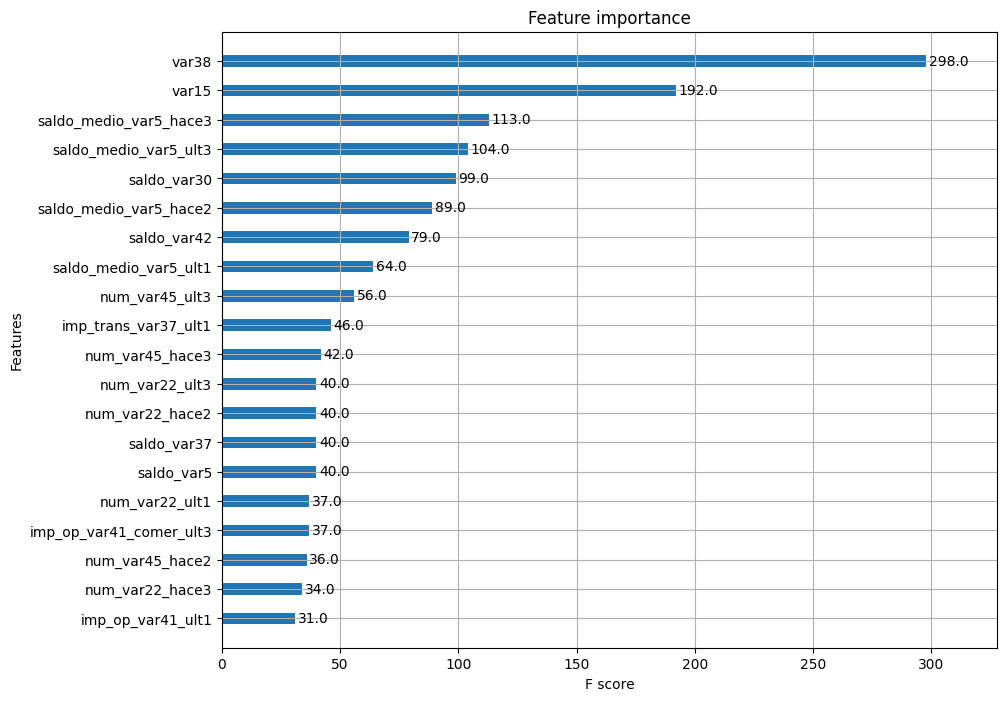

In [25]:
# 피처 중요도 그래프
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [26]:
# LightGBM으로 학습 수행
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc: 0.823733	valid_1's binary_logloss: 0.141592
[9]	training's a

[82]	training's auc: 0.930873	training's binary_logloss: 0.102757	valid_1's auc: 0.831112	valid_1's binary_logloss: 0.135917
[83]	training's auc: 0.931024	training's binary_logloss: 0.102636	valid_1's auc: 0.831065	valid_1's binary_logloss: 0.135936
[84]	training's auc: 0.931479	training's binary_logloss: 0.102405	valid_1's auc: 0.830915	valid_1's binary_logloss: 0.135993
[85]	training's auc: 0.931704	training's binary_logloss: 0.102221	valid_1's auc: 0.831007	valid_1's binary_logloss: 0.135984
[86]	training's auc: 0.931863	training's binary_logloss: 0.1021	valid_1's auc: 0.831073	valid_1's binary_logloss: 0.135943
[87]	training's auc: 0.932249	training's binary_logloss: 0.101879	valid_1's auc: 0.831022	valid_1's binary_logloss: 0.135962
[88]	training's auc: 0.932765	training's binary_logloss: 0.101605	valid_1's auc: 0.830827	valid_1's binary_logloss: 0.136022
[89]	training's auc: 0.933029	training's binary_logloss: 0.101427	valid_1's auc: 0.830847	valid_1's binary_logloss: 0.13606
[90

In [27]:
# HyperOpt로 하이퍼 파라미터 튜닝
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                   'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                   'subsample': hp.uniform('subsample', 0.7, 1),
                   'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)}

In [28]:
# 목적 함수 생성
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                                                           max_depth=int(search_space['max_depth']),
                                                           min_child_samples=int(search_space['min_child_samples']),
                                                           subsample=search_space['subsample'],
                                                           learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = [ ]
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 LGBMClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 저장
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc 값의 평균값 반환하되,
    # HyperOpt는 목적함수의 최솟값 위한 입력값 찾으므로 -1 곱
    return -1 * np.mean(roc_auc_list)

In [29]:
# fmin() 함수 호출, 최적 하이퍼 파라미터 도출
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수 호출 max_evals 지정된 횟수만큰 반복 후 목적함수의 최솟값 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
           space=lgbm_search_space,
           algo=tpe.suggest,
           max_evals=50, # 최대 반복 횟수 지정
           trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[1]	training's auc: 0.82736	training's binary_logloss: 0.162294	valid_1's auc: 0.804818	valid_1's binary_logloss: 0.163544
[2]	training's auc: 0.828309	training's binary_logloss: 0.160269	valid_1's auc: 0.804585	valid_1's binary_logloss: 0.161866
[3]	training's auc: 0.833368	training's binary_logloss: 0.158478	valid_1's auc: 0.806871	valid_1's binary_logloss: 0.16038
[4]	training's auc: 0.834671	training's binary_logloss: 0.156852	valid_1's auc: 0.80706	valid_1's binary_logloss: 0.159053
[5]	training's auc: 0.837783	training's binary_logloss: 0.155354	valid_1's auc: 0.811645	valid_1's binary_logloss: 0.157793
[6]	training's auc: 0.839052	training's binary_logloss: 0.153966	valid_1's auc: 0.81271	valid_1's binary_logloss: 0.156635
[7]	training's auc: 0.841216	training's binary_logloss: 0.152691	valid_1's auc: 0.815103	valid_1's binary_logloss: 0.155585
[8]	training's auc: 0.841859	training's binary_logloss: 0.151499	valid_1's auc: 0.814773	valid_1's binary_logloss: 0.154617
[9]	training

[31]	training's auc: 0.860346	training's binary_logloss: 0.138259	valid_1's auc: 0.835652	valid_1's binary_logloss: 0.137767
[32]	training's auc: 0.860623	training's binary_logloss: 0.137851	valid_1's auc: 0.835706	valid_1's binary_logloss: 0.137481
[33]	training's auc: 0.861233	training's binary_logloss: 0.137451	valid_1's auc: 0.835552	valid_1's binary_logloss: 0.137215
[34]	training's auc: 0.861685	training's binary_logloss: 0.137067	valid_1's auc: 0.835533	valid_1's binary_logloss: 0.136967
[35]	training's auc: 0.862184	training's binary_logloss: 0.136698	valid_1's auc: 0.835406	valid_1's binary_logloss: 0.136728
[36]	training's auc: 0.862667	training's binary_logloss: 0.136338	valid_1's auc: 0.835312	valid_1's binary_logloss: 0.136482
[37]	training's auc: 0.862991	training's binary_logloss: 0.135983	valid_1's auc: 0.835197	valid_1's binary_logloss: 0.136257
[38]	training's auc: 0.863528	training's binary_logloss: 0.135648	valid_1's auc: 0.835072	valid_1's binary_logloss: 0.136031


[99]	training's auc: 0.885685	training's binary_logloss: 0.121466	valid_1's auc: 0.837478	valid_1's binary_logloss: 0.136439
[100]	training's auc: 0.886052	training's binary_logloss: 0.121345	valid_1's auc: 0.837486	valid_1's binary_logloss: 0.136434
[1]	training's auc: 0.840138	training's binary_logloss: 0.15221	valid_1's auc: 0.812785	valid_1's binary_logloss: 0.155558
[2]	training's auc: 0.84777	training's binary_logloss: 0.145745	valid_1's auc: 0.815828	valid_1's binary_logloss: 0.150616
[3]	training's auc: 0.857571	training's binary_logloss: 0.141216	valid_1's auc: 0.821962	valid_1's binary_logloss: 0.147259
[4]	training's auc: 0.861358	training's binary_logloss: 0.137643	valid_1's auc: 0.824181	valid_1's binary_logloss: 0.144869
[5]	training's auc: 0.866559	training's binary_logloss: 0.134811	valid_1's auc: 0.825962	valid_1's binary_logloss: 0.14308
[6]	training's auc: 0.869278	training's binary_logloss: 0.132436	valid_1's auc: 0.827506	valid_1's binary_logloss: 0.141548
[7]	trai

[5]	training's auc: 0.855483	training's binary_logloss: 0.145139	valid_1's auc: 0.820538	valid_1's binary_logloss: 0.149919
[6]	training's auc: 0.856827	training's binary_logloss: 0.14298	valid_1's auc: 0.821063	valid_1's binary_logloss: 0.148333
[7]	training's auc: 0.858639	training's binary_logloss: 0.14107	valid_1's auc: 0.821902	valid_1's binary_logloss: 0.146983
[8]	training's auc: 0.859908	training's binary_logloss: 0.139361	valid_1's auc: 0.822497	valid_1's binary_logloss: 0.145726
[9]	training's auc: 0.863745	training's binary_logloss: 0.137787	valid_1's auc: 0.824282	valid_1's binary_logloss: 0.14463
[10]	training's auc: 0.864538	training's binary_logloss: 0.136428	valid_1's auc: 0.825618	valid_1's binary_logloss: 0.143613
[11]	training's auc: 0.866724	training's binary_logloss: 0.135202	valid_1's auc: 0.826482	valid_1's binary_logloss: 0.142771
[12]	training's auc: 0.867727	training's binary_logloss: 0.134076	valid_1's auc: 0.826391	valid_1's binary_logloss: 0.142056
[13]	tra

[7]	training's auc: 0.856989	training's binary_logloss: 0.140392	valid_1's auc: 0.828256	valid_1's binary_logloss: 0.148457
[8]	training's auc: 0.859909	training's binary_logloss: 0.138736	valid_1's auc: 0.828911	valid_1's binary_logloss: 0.14717
[9]	training's auc: 0.860832	training's binary_logloss: 0.137248	valid_1's auc: 0.828917	valid_1's binary_logloss: 0.146114
[10]	training's auc: 0.862409	training's binary_logloss: 0.135939	valid_1's auc: 0.829175	valid_1's binary_logloss: 0.145124
[11]	training's auc: 0.863555	training's binary_logloss: 0.134642	valid_1's auc: 0.829481	valid_1's binary_logloss: 0.144268
[12]	training's auc: 0.864843	training's binary_logloss: 0.133431	valid_1's auc: 0.829963	valid_1's binary_logloss: 0.143463
[13]	training's auc: 0.866107	training's binary_logloss: 0.13233	valid_1's auc: 0.830554	valid_1's binary_logloss: 0.142752
[14]	training's auc: 0.868249	training's binary_logloss: 0.131313	valid_1's auc: 0.830759	valid_1's binary_logloss: 0.14214
[15]	t

[25]	training's auc: 0.907057	training's binary_logloss: 0.116193	valid_1's auc: 0.834743	valid_1's binary_logloss: 0.13117
[26]	training's auc: 0.908271	training's binary_logloss: 0.115576	valid_1's auc: 0.83419	valid_1's binary_logloss: 0.131239
[27]	training's auc: 0.910741	training's binary_logloss: 0.114927	valid_1's auc: 0.833715	valid_1's binary_logloss: 0.131226
[28]	training's auc: 0.912008	training's binary_logloss: 0.114368	valid_1's auc: 0.834214	valid_1's binary_logloss: 0.131124
[29]	training's auc: 0.91352	training's binary_logloss: 0.113764	valid_1's auc: 0.83465	valid_1's binary_logloss: 0.13107
[30]	training's auc: 0.915049	training's binary_logloss: 0.113149	valid_1's auc: 0.834696	valid_1's binary_logloss: 0.131122
[31]	training's auc: 0.916345	training's binary_logloss: 0.112573	valid_1's auc: 0.835036	valid_1's binary_logloss: 0.131037
[32]	training's auc: 0.917819	training's binary_logloss: 0.112042	valid_1's auc: 0.83531	valid_1's binary_logloss: 0.131005
[33]	t

[44]	training's auc: 0.903386	training's binary_logloss: 0.116708	valid_1's auc: 0.832147	valid_1's binary_logloss: 0.135673
[45]	training's auc: 0.904051	training's binary_logloss: 0.116363	valid_1's auc: 0.832101	valid_1's binary_logloss: 0.135655
[46]	training's auc: 0.905084	training's binary_logloss: 0.116011	valid_1's auc: 0.832359	valid_1's binary_logloss: 0.135612
[47]	training's auc: 0.90589	training's binary_logloss: 0.115647	valid_1's auc: 0.832228	valid_1's binary_logloss: 0.135623
[48]	training's auc: 0.90655	training's binary_logloss: 0.115347	valid_1's auc: 0.832248	valid_1's binary_logloss: 0.135605
[49]	training's auc: 0.907434	training's binary_logloss: 0.115002	valid_1's auc: 0.832089	valid_1's binary_logloss: 0.13564
[50]	training's auc: 0.908012	training's binary_logloss: 0.114685	valid_1's auc: 0.831989	valid_1's binary_logloss: 0.135677
[51]	training's auc: 0.908832	training's binary_logloss: 0.114351	valid_1's auc: 0.831922	valid_1's binary_logloss: 0.135685
[52

[22]	training's auc: 0.879315	training's binary_logloss: 0.126365	valid_1's auc: 0.834742	valid_1's binary_logloss: 0.139403
[23]	training's auc: 0.880364	training's binary_logloss: 0.125781	valid_1's auc: 0.835072	valid_1's binary_logloss: 0.13912
[24]	training's auc: 0.881943	training's binary_logloss: 0.125204	valid_1's auc: 0.83561	valid_1's binary_logloss: 0.13884
[25]	training's auc: 0.883272	training's binary_logloss: 0.12463	valid_1's auc: 0.835652	valid_1's binary_logloss: 0.138559
[26]	training's auc: 0.884765	training's binary_logloss: 0.12408	valid_1's auc: 0.836094	valid_1's binary_logloss: 0.138359
[27]	training's auc: 0.885506	training's binary_logloss: 0.123584	valid_1's auc: 0.835833	valid_1's binary_logloss: 0.138203
[28]	training's auc: 0.886849	training's binary_logloss: 0.123024	valid_1's auc: 0.835788	valid_1's binary_logloss: 0.138025
[29]	training's auc: 0.88783	training's binary_logloss: 0.122537	valid_1's auc: 0.835565	valid_1's binary_logloss: 0.137845
[30]	t

[96]	training's auc: 0.874544	training's binary_logloss: 0.128177	valid_1's auc: 0.829916	valid_1's binary_logloss: 0.138077
[97]	training's auc: 0.874881	training's binary_logloss: 0.128043	valid_1's auc: 0.829996	valid_1's binary_logloss: 0.138012
[98]	training's auc: 0.875162	training's binary_logloss: 0.127906	valid_1's auc: 0.83007	valid_1's binary_logloss: 0.137948
[99]	training's auc: 0.875425	training's binary_logloss: 0.127775	valid_1's auc: 0.830062	valid_1's binary_logloss: 0.13788
[100]	training's auc: 0.875754	training's binary_logloss: 0.127637	valid_1's auc: 0.830052	valid_1's binary_logloss: 0.137831
[1]	training's auc: 0.82749	training's binary_logloss: 0.16565	valid_1's auc: 0.813829	valid_1's binary_logloss: 0.159659
[2]	training's auc: 0.830751	training's binary_logloss: 0.16443	valid_1's auc: 0.816626	valid_1's binary_logloss: 0.158641
[3]	training's auc: 0.831422	training's binary_logloss: 0.163283	valid_1's auc: 0.817276	valid_1's binary_logloss: 0.157694
[4]	tra

[38]	training's auc: 0.855109	training's binary_logloss: 0.13948	valid_1's auc: 0.829801	valid_1's binary_logloss: 0.147373
[39]	training's auc: 0.855549	training's binary_logloss: 0.139157	valid_1's auc: 0.829819	valid_1's binary_logloss: 0.147116
[40]	training's auc: 0.855925	training's binary_logloss: 0.138846	valid_1's auc: 0.82995	valid_1's binary_logloss: 0.146874
[41]	training's auc: 0.856023	training's binary_logloss: 0.138538	valid_1's auc: 0.829887	valid_1's binary_logloss: 0.146628
[42]	training's auc: 0.856746	training's binary_logloss: 0.138238	valid_1's auc: 0.830089	valid_1's binary_logloss: 0.146385
[43]	training's auc: 0.857068	training's binary_logloss: 0.137912	valid_1's auc: 0.830113	valid_1's binary_logloss: 0.146156
[44]	training's auc: 0.857324	training's binary_logloss: 0.137595	valid_1's auc: 0.830292	valid_1's binary_logloss: 0.145927
[45]	training's auc: 0.857489	training's binary_logloss: 0.137315	valid_1's auc: 0.830376	valid_1's binary_logloss: 0.145695
[4

[24]	training's auc: 0.899933	training's binary_logloss: 0.118186	valid_1's auc: 0.833841	valid_1's binary_logloss: 0.131296
[25]	training's auc: 0.90143	training's binary_logloss: 0.117687	valid_1's auc: 0.833563	valid_1's binary_logloss: 0.131341
[26]	training's auc: 0.903014	training's binary_logloss: 0.117196	valid_1's auc: 0.833688	valid_1's binary_logloss: 0.13132
[27]	training's auc: 0.904058	training's binary_logloss: 0.116706	valid_1's auc: 0.833698	valid_1's binary_logloss: 0.131302
[28]	training's auc: 0.905541	training's binary_logloss: 0.116125	valid_1's auc: 0.833632	valid_1's binary_logloss: 0.131355
[29]	training's auc: 0.906988	training's binary_logloss: 0.115617	valid_1's auc: 0.833135	valid_1's binary_logloss: 0.131486
[30]	training's auc: 0.907807	training's binary_logloss: 0.115199	valid_1's auc: 0.833365	valid_1's binary_logloss: 0.131489
[31]	training's auc: 0.909095	training's binary_logloss: 0.114628	valid_1's auc: 0.833802	valid_1's binary_logloss: 0.131357
[3

[21]	training's auc: 0.914937	training's binary_logloss: 0.112277	valid_1's auc: 0.833441	valid_1's binary_logloss: 0.13143
[22]	training's auc: 0.91656	training's binary_logloss: 0.111522	valid_1's auc: 0.83295	valid_1's binary_logloss: 0.131558
[23]	training's auc: 0.918392	training's binary_logloss: 0.110799	valid_1's auc: 0.832312	valid_1's binary_logloss: 0.131713
[24]	training's auc: 0.920611	training's binary_logloss: 0.110043	valid_1's auc: 0.832777	valid_1's binary_logloss: 0.131641
[25]	training's auc: 0.923301	training's binary_logloss: 0.109283	valid_1's auc: 0.832168	valid_1's binary_logloss: 0.131794
[26]	training's auc: 0.924236	training's binary_logloss: 0.108682	valid_1's auc: 0.831565	valid_1's binary_logloss: 0.131899
[27]	training's auc: 0.92634	training's binary_logloss: 0.107761	valid_1's auc: 0.831517	valid_1's binary_logloss: 0.131989
[28]	training's auc: 0.927562	training's binary_logloss: 0.107059	valid_1's auc: 0.831646	valid_1's binary_logloss: 0.131961
[29]

[27]	training's auc: 0.899317	training's binary_logloss: 0.118203	valid_1's auc: 0.835275	valid_1's binary_logloss: 0.131105
[28]	training's auc: 0.900552	training's binary_logloss: 0.117755	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.131172
[29]	training's auc: 0.902357	training's binary_logloss: 0.117273	valid_1's auc: 0.834878	valid_1's binary_logloss: 0.131167
[30]	training's auc: 0.903413	training's binary_logloss: 0.116783	valid_1's auc: 0.834534	valid_1's binary_logloss: 0.131226
[31]	training's auc: 0.904772	training's binary_logloss: 0.116346	valid_1's auc: 0.834551	valid_1's binary_logloss: 0.131209
[32]	training's auc: 0.905714	training's binary_logloss: 0.115927	valid_1's auc: 0.834596	valid_1's binary_logloss: 0.13122
[33]	training's auc: 0.907036	training's binary_logloss: 0.115432	valid_1's auc: 0.834361	valid_1's binary_logloss: 0.131303
[34]	training's auc: 0.908126	training's binary_logloss: 0.11495	valid_1's auc: 0.834322	valid_1's binary_logloss: 0.131314
[3

[55]	training's auc: 0.916301	training's binary_logloss: 0.111102	valid_1's auc: 0.829292	valid_1's binary_logloss: 0.136317
[1]	training's auc: 0.836632	training's binary_logloss: 0.160373	valid_1's auc: 0.819718	valid_1's binary_logloss: 0.155457
[2]	training's auc: 0.84326	training's binary_logloss: 0.155574	valid_1's auc: 0.821805	valid_1's binary_logloss: 0.151654
[3]	training's auc: 0.846733	training's binary_logloss: 0.151871	valid_1's auc: 0.824699	valid_1's binary_logloss: 0.148729
[4]	training's auc: 0.853304	training's binary_logloss: 0.14889	valid_1's auc: 0.830163	valid_1's binary_logloss: 0.146307
[5]	training's auc: 0.858467	training's binary_logloss: 0.1463	valid_1's auc: 0.832164	valid_1's binary_logloss: 0.144403
[6]	training's auc: 0.860449	training's binary_logloss: 0.144063	valid_1's auc: 0.832539	valid_1's binary_logloss: 0.142805
[7]	training's auc: 0.862669	training's binary_logloss: 0.142075	valid_1's auc: 0.83256	valid_1's binary_logloss: 0.141435
[8]	training

[12]	training's auc: 0.906435	training's binary_logloss: 0.114779	valid_1's auc: 0.82774	valid_1's binary_logloss: 0.136755
[13]	training's auc: 0.910874	training's binary_logloss: 0.113358	valid_1's auc: 0.826074	valid_1's binary_logloss: 0.137036
[14]	training's auc: 0.914235	training's binary_logloss: 0.112248	valid_1's auc: 0.825505	valid_1's binary_logloss: 0.13709
[15]	training's auc: 0.916024	training's binary_logloss: 0.111183	valid_1's auc: 0.825384	valid_1's binary_logloss: 0.137142
[16]	training's auc: 0.918503	training's binary_logloss: 0.110063	valid_1's auc: 0.825501	valid_1's binary_logloss: 0.137218
[17]	training's auc: 0.920318	training's binary_logloss: 0.109009	valid_1's auc: 0.824481	valid_1's binary_logloss: 0.137513
[18]	training's auc: 0.92265	training's binary_logloss: 0.107917	valid_1's auc: 0.82415	valid_1's binary_logloss: 0.137608
[19]	training's auc: 0.924544	training's binary_logloss: 0.106888	valid_1's auc: 0.824743	valid_1's binary_logloss: 0.137617
[20]

[22]	training's auc: 0.887956	training's binary_logloss: 0.125123	valid_1's auc: 0.831514	valid_1's binary_logloss: 0.137869
[23]	training's auc: 0.889226	training's binary_logloss: 0.124436	valid_1's auc: 0.831532	valid_1's binary_logloss: 0.137627
[24]	training's auc: 0.890348	training's binary_logloss: 0.123792	valid_1's auc: 0.831582	valid_1's binary_logloss: 0.137387
[25]	training's auc: 0.891491	training's binary_logloss: 0.123204	valid_1's auc: 0.831479	valid_1's binary_logloss: 0.137217
[26]	training's auc: 0.892981	training's binary_logloss: 0.122575	valid_1's auc: 0.831318	valid_1's binary_logloss: 0.137028
[27]	training's auc: 0.894086	training's binary_logloss: 0.122001	valid_1's auc: 0.831195	valid_1's binary_logloss: 0.136887
[28]	training's auc: 0.895331	training's binary_logloss: 0.121427	valid_1's auc: 0.83114	valid_1's binary_logloss: 0.136737
[29]	training's auc: 0.896178	training's binary_logloss: 0.120917	valid_1's auc: 0.830786	valid_1's binary_logloss: 0.136664
[

[55]	training's auc: 0.917883	training's binary_logloss: 0.109815	valid_1's auc: 0.833142	valid_1's binary_logloss: 0.137244
[56]	training's auc: 0.918599	training's binary_logloss: 0.109496	valid_1's auc: 0.832825	valid_1's binary_logloss: 0.137326
[57]	training's auc: 0.919398	training's binary_logloss: 0.109209	valid_1's auc: 0.832683	valid_1's binary_logloss: 0.137346
[58]	training's auc: 0.920128	training's binary_logloss: 0.108894	valid_1's auc: 0.832702	valid_1's binary_logloss: 0.137357
[59]	training's auc: 0.921035	training's binary_logloss: 0.108627	valid_1's auc: 0.832744	valid_1's binary_logloss: 0.137353
[60]	training's auc: 0.921561	training's binary_logloss: 0.108343	valid_1's auc: 0.832903	valid_1's binary_logloss: 0.137356
[61]	training's auc: 0.922328	training's binary_logloss: 0.108066	valid_1's auc: 0.833134	valid_1's binary_logloss: 0.137311
[62]	training's auc: 0.923043	training's binary_logloss: 0.107768	valid_1's auc: 0.833212	valid_1's binary_logloss: 0.137308


[30]	training's auc: 0.923577	training's binary_logloss: 0.105641	valid_1's auc: 0.828933	valid_1's binary_logloss: 0.138793
[31]	training's auc: 0.924796	training's binary_logloss: 0.105017	valid_1's auc: 0.82865	valid_1's binary_logloss: 0.138904
[32]	training's auc: 0.925347	training's binary_logloss: 0.10459	valid_1's auc: 0.828038	valid_1's binary_logloss: 0.139074
[33]	training's auc: 0.92605	training's binary_logloss: 0.104051	valid_1's auc: 0.827891	valid_1's binary_logloss: 0.139086
[34]	training's auc: 0.927614	training's binary_logloss: 0.103339	valid_1's auc: 0.827527	valid_1's binary_logloss: 0.139271
[35]	training's auc: 0.928068	training's binary_logloss: 0.102974	valid_1's auc: 0.826907	valid_1's binary_logloss: 0.139437
[36]	training's auc: 0.928695	training's binary_logloss: 0.102492	valid_1's auc: 0.826196	valid_1's binary_logloss: 0.139648
[37]	training's auc: 0.929705	training's binary_logloss: 0.10195	valid_1's auc: 0.82588	valid_1's binary_logloss: 0.139867
[38]	

[11]	training's auc: 0.860068	training's binary_logloss: 0.138125	valid_1's auc: 0.828763	valid_1's binary_logloss: 0.14718
[12]	training's auc: 0.861129	training's binary_logloss: 0.137013	valid_1's auc: 0.829145	valid_1's binary_logloss: 0.146329
[13]	training's auc: 0.863218	training's binary_logloss: 0.135972	valid_1's auc: 0.829245	valid_1's binary_logloss: 0.145534
[14]	training's auc: 0.864103	training's binary_logloss: 0.134979	valid_1's auc: 0.829457	valid_1's binary_logloss: 0.144863
[15]	training's auc: 0.865363	training's binary_logloss: 0.134062	valid_1's auc: 0.830094	valid_1's binary_logloss: 0.144221
[16]	training's auc: 0.866409	training's binary_logloss: 0.133125	valid_1's auc: 0.830369	valid_1's binary_logloss: 0.143641
[17]	training's auc: 0.867109	training's binary_logloss: 0.13229	valid_1's auc: 0.830638	valid_1's binary_logloss: 0.14312
[18]	training's auc: 0.868527	training's binary_logloss: 0.131524	valid_1's auc: 0.830652	valid_1's binary_logloss: 0.142661
[19

[16]	training's auc: 0.878375	training's binary_logloss: 0.126132	valid_1's auc: 0.832803	valid_1's binary_logloss: 0.132136
[17]	training's auc: 0.879919	training's binary_logloss: 0.125417	valid_1's auc: 0.832884	valid_1's binary_logloss: 0.131994
[18]	training's auc: 0.881454	training's binary_logloss: 0.124694	valid_1's auc: 0.832963	valid_1's binary_logloss: 0.131881
[19]	training's auc: 0.883047	training's binary_logloss: 0.124099	valid_1's auc: 0.83341	valid_1's binary_logloss: 0.13172
[20]	training's auc: 0.884674	training's binary_logloss: 0.123413	valid_1's auc: 0.834615	valid_1's binary_logloss: 0.131509
[21]	training's auc: 0.886836	training's binary_logloss: 0.122805	valid_1's auc: 0.835644	valid_1's binary_logloss: 0.13133
[22]	training's auc: 0.888153	training's binary_logloss: 0.122227	valid_1's auc: 0.835358	valid_1's binary_logloss: 0.1313
[23]	training's auc: 0.889498	training's binary_logloss: 0.121665	valid_1's auc: 0.835194	valid_1's binary_logloss: 0.131252
[24]	

[48]	training's auc: 0.911874	training's binary_logloss: 0.113697	valid_1's auc: 0.829253	valid_1's binary_logloss: 0.136032
[49]	training's auc: 0.912546	training's binary_logloss: 0.113318	valid_1's auc: 0.829113	valid_1's binary_logloss: 0.136063
[50]	training's auc: 0.91329	training's binary_logloss: 0.112964	valid_1's auc: 0.828863	valid_1's binary_logloss: 0.136104
[51]	training's auc: 0.913931	training's binary_logloss: 0.112616	valid_1's auc: 0.828603	valid_1's binary_logloss: 0.136154
[52]	training's auc: 0.914628	training's binary_logloss: 0.112278	valid_1's auc: 0.828248	valid_1's binary_logloss: 0.136203
[53]	training's auc: 0.915298	training's binary_logloss: 0.11194	valid_1's auc: 0.828316	valid_1's binary_logloss: 0.136213
[54]	training's auc: 0.915997	training's binary_logloss: 0.111626	valid_1's auc: 0.828167	valid_1's binary_logloss: 0.13625
[55]	training's auc: 0.916753	training's binary_logloss: 0.111282	valid_1's auc: 0.82824	valid_1's binary_logloss: 0.136245
[56]

[52]	training's auc: 0.914131	training's binary_logloss: 0.111616	valid_1's auc: 0.833071	valid_1's binary_logloss: 0.137279
[53]	training's auc: 0.91476	training's binary_logloss: 0.111255	valid_1's auc: 0.832876	valid_1's binary_logloss: 0.13732
[54]	training's auc: 0.915462	training's binary_logloss: 0.110924	valid_1's auc: 0.832893	valid_1's binary_logloss: 0.137343
[55]	training's auc: 0.9162	training's binary_logloss: 0.110571	valid_1's auc: 0.832711	valid_1's binary_logloss: 0.137367
[56]	training's auc: 0.916909	training's binary_logloss: 0.110236	valid_1's auc: 0.832676	valid_1's binary_logloss: 0.137375
[57]	training's auc: 0.9177	training's binary_logloss: 0.109895	valid_1's auc: 0.832498	valid_1's binary_logloss: 0.137421
[58]	training's auc: 0.918245	training's binary_logloss: 0.109625	valid_1's auc: 0.832157	valid_1's binary_logloss: 0.137476
[59]	training's auc: 0.919175	training's binary_logloss: 0.109318	valid_1's auc: 0.832079	valid_1's binary_logloss: 0.137485
[1]	tr

[23]	training's auc: 0.858765	training's binary_logloss: 0.141335	valid_1's auc: 0.835137	valid_1's binary_logloss: 0.140292
[24]	training's auc: 0.860117	training's binary_logloss: 0.140781	valid_1's auc: 0.835423	valid_1's binary_logloss: 0.139871
[25]	training's auc: 0.860391	training's binary_logloss: 0.140243	valid_1's auc: 0.83552	valid_1's binary_logloss: 0.139482
[26]	training's auc: 0.86115	training's binary_logloss: 0.139712	valid_1's auc: 0.83562	valid_1's binary_logloss: 0.139114
[27]	training's auc: 0.861774	training's binary_logloss: 0.139198	valid_1's auc: 0.835531	valid_1's binary_logloss: 0.138761
[28]	training's auc: 0.862102	training's binary_logloss: 0.138724	valid_1's auc: 0.836016	valid_1's binary_logloss: 0.138418
[29]	training's auc: 0.862732	training's binary_logloss: 0.138259	valid_1's auc: 0.835853	valid_1's binary_logloss: 0.138107
[30]	training's auc: 0.86325	training's binary_logloss: 0.13781	valid_1's auc: 0.835964	valid_1's binary_logloss: 0.137801
[31]	

[95]	training's auc: 0.890362	training's binary_logloss: 0.120164	valid_1's auc: 0.836503	valid_1's binary_logloss: 0.136713
[96]	training's auc: 0.89066	training's binary_logloss: 0.120019	valid_1's auc: 0.836356	valid_1's binary_logloss: 0.136702
[97]	training's auc: 0.890904	training's binary_logloss: 0.1199	valid_1's auc: 0.8365	valid_1's binary_logloss: 0.136678
[1]	training's auc: 0.841967	training's binary_logloss: 0.154699	valid_1's auc: 0.808454	valid_1's binary_logloss: 0.157576
[2]	training's auc: 0.848045	training's binary_logloss: 0.148799	valid_1's auc: 0.81328	valid_1's binary_logloss: 0.152919
[3]	training's auc: 0.857687	training's binary_logloss: 0.144557	valid_1's auc: 0.820847	valid_1's binary_logloss: 0.149641
[4]	training's auc: 0.860302	training's binary_logloss: 0.141075	valid_1's auc: 0.821677	valid_1's binary_logloss: 0.147239
[5]	training's auc: 0.863256	training's binary_logloss: 0.138172	valid_1's auc: 0.823157	valid_1's binary_logloss: 0.145345
[6]	trainin

[25]	training's auc: 0.904922	training's binary_logloss: 0.114957	valid_1's auc: 0.83417	valid_1's binary_logloss: 0.1371
[26]	training's auc: 0.906106	training's binary_logloss: 0.114356	valid_1's auc: 0.833979	valid_1's binary_logloss: 0.1371
[27]	training's auc: 0.907251	training's binary_logloss: 0.113655	valid_1's auc: 0.833846	valid_1's binary_logloss: 0.137057
[28]	training's auc: 0.908849	training's binary_logloss: 0.113047	valid_1's auc: 0.833668	valid_1's binary_logloss: 0.137063
[29]	training's auc: 0.909944	training's binary_logloss: 0.112555	valid_1's auc: 0.833444	valid_1's binary_logloss: 0.137061
[30]	training's auc: 0.91233	training's binary_logloss: 0.111953	valid_1's auc: 0.833885	valid_1's binary_logloss: 0.13698
[31]	training's auc: 0.9135	training's binary_logloss: 0.111394	valid_1's auc: 0.834103	valid_1's binary_logloss: 0.136955
[32]	training's auc: 0.914465	training's binary_logloss: 0.110917	valid_1's auc: 0.834211	valid_1's binary_logloss: 0.136891
[33]	trai

[2]	training's auc: 0.850069	training's binary_logloss: 0.144858	valid_1's auc: 0.830318	valid_1's binary_logloss: 0.143351
[3]	training's auc: 0.856787	training's binary_logloss: 0.140217	valid_1's auc: 0.832612	valid_1's binary_logloss: 0.140112
[4]	training's auc: 0.861967	training's binary_logloss: 0.136667	valid_1's auc: 0.83279	valid_1's binary_logloss: 0.137938
[5]	training's auc: 0.866165	training's binary_logloss: 0.133851	valid_1's auc: 0.832653	valid_1's binary_logloss: 0.136397
[6]	training's auc: 0.869003	training's binary_logloss: 0.131621	valid_1's auc: 0.833731	valid_1's binary_logloss: 0.134972
[7]	training's auc: 0.873249	training's binary_logloss: 0.129588	valid_1's auc: 0.832667	valid_1's binary_logloss: 0.134188
[8]	training's auc: 0.876999	training's binary_logloss: 0.127784	valid_1's auc: 0.832139	valid_1's binary_logloss: 0.133572
[9]	training's auc: 0.879535	training's binary_logloss: 0.126318	valid_1's auc: 0.832206	valid_1's binary_logloss: 0.13314
[10]	train

[48]	training's auc: 0.873573	training's binary_logloss: 0.129208	valid_1's auc: 0.829939	valid_1's binary_logloss: 0.138669
[49]	training's auc: 0.873905	training's binary_logloss: 0.128955	valid_1's auc: 0.829945	valid_1's binary_logloss: 0.138544
[50]	training's auc: 0.874277	training's binary_logloss: 0.128688	valid_1's auc: 0.829978	valid_1's binary_logloss: 0.138432
[51]	training's auc: 0.874941	training's binary_logloss: 0.12842	valid_1's auc: 0.830216	valid_1's binary_logloss: 0.138299
[52]	training's auc: 0.875707	training's binary_logloss: 0.128168	valid_1's auc: 0.830501	valid_1's binary_logloss: 0.138184
[53]	training's auc: 0.876076	training's binary_logloss: 0.127936	valid_1's auc: 0.830732	valid_1's binary_logloss: 0.138059
[54]	training's auc: 0.87643	training's binary_logloss: 0.127714	valid_1's auc: 0.83075	valid_1's binary_logloss: 0.13794
[55]	training's auc: 0.877021	training's binary_logloss: 0.12747	valid_1's auc: 0.830883	valid_1's binary_logloss: 0.137834
[56]	

[78]	training's auc: 0.883856	training's binary_logloss: 0.125106	valid_1's auc: 0.835731	valid_1's binary_logloss: 0.131629
[79]	training's auc: 0.88424	training's binary_logloss: 0.124924	valid_1's auc: 0.835658	valid_1's binary_logloss: 0.131583
[80]	training's auc: 0.88463	training's binary_logloss: 0.124756	valid_1's auc: 0.835664	valid_1's binary_logloss: 0.131536
[81]	training's auc: 0.885186	training's binary_logloss: 0.124565	valid_1's auc: 0.83563	valid_1's binary_logloss: 0.131494
[82]	training's auc: 0.885501	training's binary_logloss: 0.124408	valid_1's auc: 0.835686	valid_1's binary_logloss: 0.131441
[83]	training's auc: 0.885943	training's binary_logloss: 0.124239	valid_1's auc: 0.83576	valid_1's binary_logloss: 0.131401
[1]	training's auc: 0.828756	training's binary_logloss: 0.160855	valid_1's auc: 0.806893	valid_1's binary_logloss: 0.166476
[2]	training's auc: 0.830839	training's binary_logloss: 0.158872	valid_1's auc: 0.810619	valid_1's binary_logloss: 0.1646
[3]	trai

[25]	training's auc: 0.901089	training's binary_logloss: 0.117538	valid_1's auc: 0.829073	valid_1's binary_logloss: 0.136418
[26]	training's auc: 0.902003	training's binary_logloss: 0.116966	valid_1's auc: 0.829406	valid_1's binary_logloss: 0.136367
[27]	training's auc: 0.903895	training's binary_logloss: 0.116317	valid_1's auc: 0.828871	valid_1's binary_logloss: 0.136446
[28]	training's auc: 0.905209	training's binary_logloss: 0.115758	valid_1's auc: 0.828798	valid_1's binary_logloss: 0.136382
[29]	training's auc: 0.906594	training's binary_logloss: 0.11516	valid_1's auc: 0.828396	valid_1's binary_logloss: 0.136439
[30]	training's auc: 0.907535	training's binary_logloss: 0.114698	valid_1's auc: 0.82832	valid_1's binary_logloss: 0.136437
[31]	training's auc: 0.909086	training's binary_logloss: 0.114117	valid_1's auc: 0.828633	valid_1's binary_logloss: 0.136451
[32]	training's auc: 0.910027	training's binary_logloss: 0.113677	valid_1's auc: 0.828317	valid_1's binary_logloss: 0.136535
[3

[45]	training's auc: 0.923087	training's binary_logloss: 0.107264	valid_1's auc: 0.832904	valid_1's binary_logloss: 0.13731
[46]	training's auc: 0.924507	training's binary_logloss: 0.106902	valid_1's auc: 0.832612	valid_1's binary_logloss: 0.137354
[47]	training's auc: 0.92539	training's binary_logloss: 0.106577	valid_1's auc: 0.832493	valid_1's binary_logloss: 0.1374
[48]	training's auc: 0.926345	training's binary_logloss: 0.106112	valid_1's auc: 0.832214	valid_1's binary_logloss: 0.137505
[49]	training's auc: 0.927053	training's binary_logloss: 0.105734	valid_1's auc: 0.831899	valid_1's binary_logloss: 0.137581
[1]	training's auc: 0.83538	training's binary_logloss: 0.148737	valid_1's auc: 0.811409	valid_1's binary_logloss: 0.152714
[2]	training's auc: 0.850586	training's binary_logloss: 0.142113	valid_1's auc: 0.81997	valid_1's binary_logloss: 0.147604
[3]	training's auc: 0.858963	training's binary_logloss: 0.137527	valid_1's auc: 0.82295	valid_1's binary_logloss: 0.144504
[4]	traini

[38]	training's auc: 0.935048	training's binary_logloss: 0.1002	valid_1's auc: 0.824628	valid_1's binary_logloss: 0.140352
[39]	training's auc: 0.936385	training's binary_logloss: 0.0995407	valid_1's auc: 0.824673	valid_1's binary_logloss: 0.140422
[40]	training's auc: 0.937106	training's binary_logloss: 0.0990388	valid_1's auc: 0.824518	valid_1's binary_logloss: 0.140484
[41]	training's auc: 0.937689	training's binary_logloss: 0.0985844	valid_1's auc: 0.82411	valid_1's binary_logloss: 0.140597
[42]	training's auc: 0.938541	training's binary_logloss: 0.0980533	valid_1's auc: 0.824232	valid_1's binary_logloss: 0.140588
[1]	training's auc: 0.8382	training's binary_logloss: 0.161482	valid_1's auc: 0.808597	valid_1's binary_logloss: 0.162869
[2]	training's auc: 0.839319	training's binary_logloss: 0.158855	valid_1's auc: 0.809131	valid_1's binary_logloss: 0.160701
[3]	training's auc: 0.841326	training's binary_logloss: 0.156614	valid_1's auc: 0.809322	valid_1's binary_logloss: 0.158864
[4]	

[26]	training's auc: 0.868162	training's binary_logloss: 0.135925	valid_1's auc: 0.834668	valid_1's binary_logloss: 0.136836
[27]	training's auc: 0.868729	training's binary_logloss: 0.13543	valid_1's auc: 0.83469	valid_1's binary_logloss: 0.136508
[28]	training's auc: 0.86921	training's binary_logloss: 0.134956	valid_1's auc: 0.8347	valid_1's binary_logloss: 0.136191
[29]	training's auc: 0.869953	training's binary_logloss: 0.134503	valid_1's auc: 0.834737	valid_1's binary_logloss: 0.135906
[30]	training's auc: 0.870379	training's binary_logloss: 0.134074	valid_1's auc: 0.834852	valid_1's binary_logloss: 0.135619
[31]	training's auc: 0.87071	training's binary_logloss: 0.133657	valid_1's auc: 0.834982	valid_1's binary_logloss: 0.13535
[32]	training's auc: 0.870944	training's binary_logloss: 0.133267	valid_1's auc: 0.83475	valid_1's binary_logloss: 0.135109
[33]	training's auc: 0.871536	training's binary_logloss: 0.13288	valid_1's auc: 0.834853	valid_1's binary_logloss: 0.134872
[34]	trai

[82]	training's auc: 0.896742	training's binary_logloss: 0.118035	valid_1's auc: 0.835937	valid_1's binary_logloss: 0.136592
[83]	training's auc: 0.897114	training's binary_logloss: 0.117889	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.136563
[84]	training's auc: 0.897572	training's binary_logloss: 0.117709	valid_1's auc: 0.835735	valid_1's binary_logloss: 0.13656
[85]	training's auc: 0.898047	training's binary_logloss: 0.117537	valid_1's auc: 0.835695	valid_1's binary_logloss: 0.136548
[86]	training's auc: 0.898445	training's binary_logloss: 0.117373	valid_1's auc: 0.835643	valid_1's binary_logloss: 0.136531
[87]	training's auc: 0.898938	training's binary_logloss: 0.117198	valid_1's auc: 0.83551	valid_1's binary_logloss: 0.136528
[88]	training's auc: 0.899219	training's binary_logloss: 0.117063	valid_1's auc: 0.835404	valid_1's binary_logloss: 0.136525
[89]	training's auc: 0.899602	training's binary_logloss: 0.116911	valid_1's auc: 0.835533	valid_1's binary_logloss: 0.136496
[9

[67]	training's auc: 0.935031	training's binary_logloss: 0.103822	valid_1's auc: 0.832748	valid_1's binary_logloss: 0.131873
[68]	training's auc: 0.935526	training's binary_logloss: 0.103489	valid_1's auc: 0.832466	valid_1's binary_logloss: 0.131959
[69]	training's auc: 0.936084	training's binary_logloss: 0.103171	valid_1's auc: 0.83195	valid_1's binary_logloss: 0.132102
[70]	training's auc: 0.936516	training's binary_logloss: 0.102867	valid_1's auc: 0.831952	valid_1's binary_logloss: 0.132118
[71]	training's auc: 0.937004	training's binary_logloss: 0.102571	valid_1's auc: 0.831682	valid_1's binary_logloss: 0.132195
[72]	training's auc: 0.937429	training's binary_logloss: 0.102295	valid_1's auc: 0.831619	valid_1's binary_logloss: 0.132238
[73]	training's auc: 0.937698	training's binary_logloss: 0.102045	valid_1's auc: 0.831624	valid_1's binary_logloss: 0.132282
[74]	training's auc: 0.93809	training's binary_logloss: 0.101864	valid_1's auc: 0.831692	valid_1's binary_logloss: 0.132298
[7

[24]	training's auc: 0.896809	training's binary_logloss: 0.118599	valid_1's auc: 0.833418	valid_1's binary_logloss: 0.131531
[25]	training's auc: 0.898099	training's binary_logloss: 0.118172	valid_1's auc: 0.833349	valid_1's binary_logloss: 0.131572
[26]	training's auc: 0.899331	training's binary_logloss: 0.117687	valid_1's auc: 0.832766	valid_1's binary_logloss: 0.131709
[27]	training's auc: 0.900604	training's binary_logloss: 0.117238	valid_1's auc: 0.83309	valid_1's binary_logloss: 0.131667
[28]	training's auc: 0.901967	training's binary_logloss: 0.116747	valid_1's auc: 0.83329	valid_1's binary_logloss: 0.131709
[29]	training's auc: 0.902893	training's binary_logloss: 0.116286	valid_1's auc: 0.833138	valid_1's binary_logloss: 0.131734
[30]	training's auc: 0.904003	training's binary_logloss: 0.115805	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.131764
[31]	training's auc: 0.905971	training's binary_logloss: 0.115281	valid_1's auc: 0.832355	valid_1's binary_logloss: 0.131832
[3

[55]	training's auc: 0.888636	training's binary_logloss: 0.122291	valid_1's auc: 0.831071	valid_1's binary_logloss: 0.136212
[56]	training's auc: 0.889198	training's binary_logloss: 0.122059	valid_1's auc: 0.831269	valid_1's binary_logloss: 0.136161
[57]	training's auc: 0.889667	training's binary_logloss: 0.121825	valid_1's auc: 0.831469	valid_1's binary_logloss: 0.136095
[58]	training's auc: 0.89044	training's binary_logloss: 0.121592	valid_1's auc: 0.831512	valid_1's binary_logloss: 0.136066
[59]	training's auc: 0.89098	training's binary_logloss: 0.121375	valid_1's auc: 0.831443	valid_1's binary_logloss: 0.136051
[60]	training's auc: 0.891499	training's binary_logloss: 0.121143	valid_1's auc: 0.831373	valid_1's binary_logloss: 0.136006
[61]	training's auc: 0.89175	training's binary_logloss: 0.120948	valid_1's auc: 0.831553	valid_1's binary_logloss: 0.135938
[62]	training's auc: 0.892209	training's binary_logloss: 0.120733	valid_1's auc: 0.831684	valid_1's binary_logloss: 0.135888
[63

[31]	training's auc: 0.871601	training's binary_logloss: 0.129186	valid_1's auc: 0.836011	valid_1's binary_logloss: 0.140124
[32]	training's auc: 0.871944	training's binary_logloss: 0.128802	valid_1's auc: 0.835661	valid_1's binary_logloss: 0.13994
[33]	training's auc: 0.872855	training's binary_logloss: 0.12841	valid_1's auc: 0.835898	valid_1's binary_logloss: 0.139712
[34]	training's auc: 0.873409	training's binary_logloss: 0.128045	valid_1's auc: 0.835807	valid_1's binary_logloss: 0.139507
[35]	training's auc: 0.874499	training's binary_logloss: 0.127682	valid_1's auc: 0.835631	valid_1's binary_logloss: 0.139324
[36]	training's auc: 0.875137	training's binary_logloss: 0.127335	valid_1's auc: 0.835783	valid_1's binary_logloss: 0.139116
[37]	training's auc: 0.876069	training's binary_logloss: 0.12699	valid_1's auc: 0.836177	valid_1's binary_logloss: 0.13894
[38]	training's auc: 0.87688	training's binary_logloss: 0.126646	valid_1's auc: 0.836395	valid_1's binary_logloss: 0.138747
[39]	

[20]	training's auc: 0.89391	training's binary_logloss: 0.122853	valid_1's auc: 0.831386	valid_1's binary_logloss: 0.132708
[21]	training's auc: 0.895157	training's binary_logloss: 0.122063	valid_1's auc: 0.831932	valid_1's binary_logloss: 0.132467
[22]	training's auc: 0.896813	training's binary_logloss: 0.121279	valid_1's auc: 0.831933	valid_1's binary_logloss: 0.132312
[23]	training's auc: 0.898892	training's binary_logloss: 0.12051	valid_1's auc: 0.832498	valid_1's binary_logloss: 0.132149
[24]	training's auc: 0.900307	training's binary_logloss: 0.11976	valid_1's auc: 0.832566	valid_1's binary_logloss: 0.132029
[25]	training's auc: 0.901732	training's binary_logloss: 0.119067	valid_1's auc: 0.832448	valid_1's binary_logloss: 0.131978
[26]	training's auc: 0.902804	training's binary_logloss: 0.118421	valid_1's auc: 0.832409	valid_1's binary_logloss: 0.131934
[27]	training's auc: 0.904155	training's binary_logloss: 0.117814	valid_1's auc: 0.832621	valid_1's binary_logloss: 0.131842
[28

[28]	training's auc: 0.905303	training's binary_logloss: 0.114005	valid_1's auc: 0.824512	valid_1's binary_logloss: 0.137525
[29]	training's auc: 0.906252	training's binary_logloss: 0.113578	valid_1's auc: 0.824064	valid_1's binary_logloss: 0.137577
[30]	training's auc: 0.907759	training's binary_logloss: 0.113019	valid_1's auc: 0.823947	valid_1's binary_logloss: 0.137682
[31]	training's auc: 0.909013	training's binary_logloss: 0.112486	valid_1's auc: 0.82262	valid_1's binary_logloss: 0.137963
[32]	training's auc: 0.909803	training's binary_logloss: 0.112081	valid_1's auc: 0.821576	valid_1's binary_logloss: 0.13826
[33]	training's auc: 0.911094	training's binary_logloss: 0.111582	valid_1's auc: 0.820954	valid_1's binary_logloss: 0.138383
[34]	training's auc: 0.913004	training's binary_logloss: 0.111011	valid_1's auc: 0.820005	valid_1's binary_logloss: 0.138634
[35]	training's auc: 0.914196	training's binary_logloss: 0.110652	valid_1's auc: 0.819795	valid_1's binary_logloss: 0.138699
[3

[6]	training's auc: 0.850456	training's binary_logloss: 0.148934	valid_1's auc: 0.817837	valid_1's binary_logloss: 0.152784
[7]	training's auc: 0.852786	training's binary_logloss: 0.147283	valid_1's auc: 0.818951	valid_1's binary_logloss: 0.151473
[8]	training's auc: 0.854392	training's binary_logloss: 0.145781	valid_1's auc: 0.820556	valid_1's binary_logloss: 0.15031
[9]	training's auc: 0.855122	training's binary_logloss: 0.14438	valid_1's auc: 0.82144	valid_1's binary_logloss: 0.149236
[10]	training's auc: 0.856683	training's binary_logloss: 0.143098	valid_1's auc: 0.822291	valid_1's binary_logloss: 0.14826
[11]	training's auc: 0.857304	training's binary_logloss: 0.141905	valid_1's auc: 0.822611	valid_1's binary_logloss: 0.147405
[12]	training's auc: 0.857897	training's binary_logloss: 0.140816	valid_1's auc: 0.822614	valid_1's binary_logloss: 0.146595
[13]	training's auc: 0.861194	training's binary_logloss: 0.13979	valid_1's auc: 0.824106	valid_1's binary_logloss: 0.14584
[14]	train

[9]	training's auc: 0.852842	training's binary_logloss: 0.143726	valid_1's auc: 0.829407	valid_1's binary_logloss: 0.150869
[10]	training's auc: 0.853757	training's binary_logloss: 0.142444	valid_1's auc: 0.829643	valid_1's binary_logloss: 0.149818
[11]	training's auc: 0.854789	training's binary_logloss: 0.141309	valid_1's auc: 0.829754	valid_1's binary_logloss: 0.148869
[12]	training's auc: 0.855793	training's binary_logloss: 0.140216	valid_1's auc: 0.829485	valid_1's binary_logloss: 0.148044
[13]	training's auc: 0.857612	training's binary_logloss: 0.139197	valid_1's auc: 0.830948	valid_1's binary_logloss: 0.147227
[14]	training's auc: 0.858362	training's binary_logloss: 0.138263	valid_1's auc: 0.831148	valid_1's binary_logloss: 0.146487
[15]	training's auc: 0.859307	training's binary_logloss: 0.137393	valid_1's auc: 0.830906	valid_1's binary_logloss: 0.145823
[16]	training's auc: 0.86027	training's binary_logloss: 0.136579	valid_1's auc: 0.830887	valid_1's binary_logloss: 0.145221
[1

[47]	training's auc: 0.926696	training's binary_logloss: 0.107105	valid_1's auc: 0.827164	valid_1's binary_logloss: 0.136691
[48]	training's auc: 0.927386	training's binary_logloss: 0.106687	valid_1's auc: 0.827235	valid_1's binary_logloss: 0.136685
[49]	training's auc: 0.927889	training's binary_logloss: 0.106294	valid_1's auc: 0.827188	valid_1's binary_logloss: 0.136727
[1]	training's auc: 0.840199	training's binary_logloss: 0.159252	valid_1's auc: 0.817536	valid_1's binary_logloss: 0.154764
[2]	training's auc: 0.847159	training's binary_logloss: 0.15391	valid_1's auc: 0.820761	valid_1's binary_logloss: 0.150677
[3]	training's auc: 0.856469	training's binary_logloss: 0.149802	valid_1's auc: 0.82657	valid_1's binary_logloss: 0.147636
[4]	training's auc: 0.863979	training's binary_logloss: 0.146462	valid_1's auc: 0.830375	valid_1's binary_logloss: 0.145274
[5]	training's auc: 0.866128	training's binary_logloss: 0.143715	valid_1's auc: 0.831201	valid_1's binary_logloss: 0.143358
[6]	tra

[64]	training's auc: 0.937863	training's binary_logloss: 0.102889	valid_1's auc: 0.833651	valid_1's binary_logloss: 0.131567
[65]	training's auc: 0.938477	training's binary_logloss: 0.102503	valid_1's auc: 0.833872	valid_1's binary_logloss: 0.131586
[66]	training's auc: 0.938844	training's binary_logloss: 0.102225	valid_1's auc: 0.833712	valid_1's binary_logloss: 0.13167
[67]	training's auc: 0.939285	training's binary_logloss: 0.101992	valid_1's auc: 0.833527	valid_1's binary_logloss: 0.13174
[68]	training's auc: 0.939676	training's binary_logloss: 0.101676	valid_1's auc: 0.833261	valid_1's binary_logloss: 0.131833
[69]	training's auc: 0.940325	training's binary_logloss: 0.101305	valid_1's auc: 0.833001	valid_1's binary_logloss: 0.131895
[70]	training's auc: 0.940785	training's binary_logloss: 0.101018	valid_1's auc: 0.832855	valid_1's binary_logloss: 0.131936
[71]	training's auc: 0.941133	training's binary_logloss: 0.100719	valid_1's auc: 0.832694	valid_1's binary_logloss: 0.131953
[7

[8]	training's auc: 0.860991	training's binary_logloss: 0.134386	valid_1's auc: 0.833394	valid_1's binary_logloss: 0.135287
[9]	training's auc: 0.864031	training's binary_logloss: 0.13294	valid_1's auc: 0.833869	valid_1's binary_logloss: 0.134456
[10]	training's auc: 0.866355	training's binary_logloss: 0.131713	valid_1's auc: 0.834439	valid_1's binary_logloss: 0.13383
[11]	training's auc: 0.868013	training's binary_logloss: 0.130658	valid_1's auc: 0.834174	valid_1's binary_logloss: 0.133333
[12]	training's auc: 0.869579	training's binary_logloss: 0.129616	valid_1's auc: 0.834804	valid_1's binary_logloss: 0.132752
[13]	training's auc: 0.871357	training's binary_logloss: 0.128642	valid_1's auc: 0.834969	valid_1's binary_logloss: 0.132422
[14]	training's auc: 0.872897	training's binary_logloss: 0.127732	valid_1's auc: 0.835216	valid_1's binary_logloss: 0.132064
[15]	training's auc: 0.874137	training's binary_logloss: 0.126966	valid_1's auc: 0.835186	valid_1's binary_logloss: 0.131775
[16]

[27]	training's auc: 0.850263	training's binary_logloss: 0.147918	valid_1's auc: 0.820117	valid_1's binary_logloss: 0.151685
[28]	training's auc: 0.850838	training's binary_logloss: 0.147522	valid_1's auc: 0.819742	valid_1's binary_logloss: 0.151368
[29]	training's auc: 0.851159	training's binary_logloss: 0.14713	valid_1's auc: 0.820043	valid_1's binary_logloss: 0.151057
[30]	training's auc: 0.85171	training's binary_logloss: 0.146741	valid_1's auc: 0.82124	valid_1's binary_logloss: 0.150758
[31]	training's auc: 0.852202	training's binary_logloss: 0.146369	valid_1's auc: 0.821717	valid_1's binary_logloss: 0.15046
[32]	training's auc: 0.852413	training's binary_logloss: 0.146005	valid_1's auc: 0.822021	valid_1's binary_logloss: 0.150155
[33]	training's auc: 0.852304	training's binary_logloss: 0.145651	valid_1's auc: 0.821859	valid_1's binary_logloss: 0.149873
[34]	training's auc: 0.852682	training's binary_logloss: 0.145305	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.149601
[35]

[57]	training's auc: 0.858037	training's binary_logloss: 0.141254	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.139994
[58]	training's auc: 0.858376	training's binary_logloss: 0.141025	valid_1's auc: 0.834776	valid_1's binary_logloss: 0.139828
[59]	training's auc: 0.858498	training's binary_logloss: 0.140804	valid_1's auc: 0.834737	valid_1's binary_logloss: 0.139669
[60]	training's auc: 0.85885	training's binary_logloss: 0.140577	valid_1's auc: 0.834813	valid_1's binary_logloss: 0.139506
[61]	training's auc: 0.859241	training's binary_logloss: 0.140351	valid_1's auc: 0.834801	valid_1's binary_logloss: 0.139343
[62]	training's auc: 0.859424	training's binary_logloss: 0.140139	valid_1's auc: 0.834795	valid_1's binary_logloss: 0.139191
[63]	training's auc: 0.859768	training's binary_logloss: 0.139926	valid_1's auc: 0.834873	valid_1's binary_logloss: 0.139031
[64]	training's auc: 0.860126	training's binary_logloss: 0.139725	valid_1's auc: 0.834904	valid_1's binary_logloss: 0.138885
[

[87]	training's auc: 0.862141	training's binary_logloss: 0.132886	valid_1's auc: 0.832491	valid_1's binary_logloss: 0.142198
[88]	training's auc: 0.863368	training's binary_logloss: 0.132753	valid_1's auc: 0.834596	valid_1's binary_logloss: 0.142092
[89]	training's auc: 0.863555	training's binary_logloss: 0.132606	valid_1's auc: 0.834727	valid_1's binary_logloss: 0.141985
[90]	training's auc: 0.863756	training's binary_logloss: 0.132472	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.141895
[91]	training's auc: 0.863983	training's binary_logloss: 0.132334	valid_1's auc: 0.835059	valid_1's binary_logloss: 0.141792
[92]	training's auc: 0.86418	training's binary_logloss: 0.132197	valid_1's auc: 0.834993	valid_1's binary_logloss: 0.141697
[93]	training's auc: 0.864381	training's binary_logloss: 0.132057	valid_1's auc: 0.834995	valid_1's binary_logloss: 0.14161
[94]	training's auc: 0.864614	training's binary_logloss: 0.131927	valid_1's auc: 0.83507	valid_1's binary_logloss: 0.141517
[95

[68]	training's auc: 0.929788	training's binary_logloss: 0.106465	valid_1's auc: 0.834496	valid_1's binary_logloss: 0.131134
[69]	training's auc: 0.930209	training's binary_logloss: 0.106227	valid_1's auc: 0.834726	valid_1's binary_logloss: 0.131108
[70]	training's auc: 0.930543	training's binary_logloss: 0.105977	valid_1's auc: 0.834517	valid_1's binary_logloss: 0.131161
[71]	training's auc: 0.931079	training's binary_logloss: 0.105733	valid_1's auc: 0.834274	valid_1's binary_logloss: 0.131227
[72]	training's auc: 0.93159	training's binary_logloss: 0.105438	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.131224
[73]	training's auc: 0.931962	training's binary_logloss: 0.105196	valid_1's auc: 0.834471	valid_1's binary_logloss: 0.131228
[74]	training's auc: 0.932377	training's binary_logloss: 0.104952	valid_1's auc: 0.834473	valid_1's binary_logloss: 0.131258
[75]	training's auc: 0.932708	training's binary_logloss: 0.104715	valid_1's auc: 0.834491	valid_1's binary_logloss: 0.131263
[

[18]	training's auc: 0.883538	training's binary_logloss: 0.124391	valid_1's auc: 0.833571	valid_1's binary_logloss: 0.1322
[19]	training's auc: 0.885286	training's binary_logloss: 0.123644	valid_1's auc: 0.834316	valid_1's binary_logloss: 0.132003
[20]	training's auc: 0.886689	training's binary_logloss: 0.122985	valid_1's auc: 0.834258	valid_1's binary_logloss: 0.131886
[21]	training's auc: 0.887894	training's binary_logloss: 0.122337	valid_1's auc: 0.834181	valid_1's binary_logloss: 0.131787
[22]	training's auc: 0.889301	training's binary_logloss: 0.121717	valid_1's auc: 0.834326	valid_1's binary_logloss: 0.131773
[23]	training's auc: 0.890571	training's binary_logloss: 0.121187	valid_1's auc: 0.83502	valid_1's binary_logloss: 0.131631
[24]	training's auc: 0.891968	training's binary_logloss: 0.120621	valid_1's auc: 0.835095	valid_1's binary_logloss: 0.131593
[25]	training's auc: 0.893212	training's binary_logloss: 0.12012	valid_1's auc: 0.834972	valid_1's binary_logloss: 0.131583
[26]

[50]	training's auc: 0.858064	training's binary_logloss: 0.140184	valid_1's auc: 0.824675	valid_1's binary_logloss: 0.145738
[51]	training's auc: 0.858329	training's binary_logloss: 0.139932	valid_1's auc: 0.824822	valid_1's binary_logloss: 0.145548
[52]	training's auc: 0.858652	training's binary_logloss: 0.139688	valid_1's auc: 0.825042	valid_1's binary_logloss: 0.145363
[53]	training's auc: 0.85891	training's binary_logloss: 0.139448	valid_1's auc: 0.825014	valid_1's binary_logloss: 0.145189
[54]	training's auc: 0.859127	training's binary_logloss: 0.139212	valid_1's auc: 0.825051	valid_1's binary_logloss: 0.145009
[55]	training's auc: 0.859243	training's binary_logloss: 0.138984	valid_1's auc: 0.825352	valid_1's binary_logloss: 0.144839
[56]	training's auc: 0.859321	training's binary_logloss: 0.138758	valid_1's auc: 0.825349	valid_1's binary_logloss: 0.144679
[57]	training's auc: 0.859416	training's binary_logloss: 0.138537	valid_1's auc: 0.825596	valid_1's binary_logloss: 0.144502
[

[80]	training's auc: 0.863662	training's binary_logloss: 0.136537	valid_1's auc: 0.834749	valid_1's binary_logloss: 0.136555
[81]	training's auc: 0.863813	training's binary_logloss: 0.13638	valid_1's auc: 0.834614	valid_1's binary_logloss: 0.136446
[82]	training's auc: 0.864327	training's binary_logloss: 0.136222	valid_1's auc: 0.834572	valid_1's binary_logloss: 0.136348
[83]	training's auc: 0.864501	training's binary_logloss: 0.136071	valid_1's auc: 0.8345	valid_1's binary_logloss: 0.136249
[84]	training's auc: 0.864626	training's binary_logloss: 0.135919	valid_1's auc: 0.834549	valid_1's binary_logloss: 0.136146
[85]	training's auc: 0.864851	training's binary_logloss: 0.135765	valid_1's auc: 0.834681	valid_1's binary_logloss: 0.136052
[86]	training's auc: 0.864968	training's binary_logloss: 0.135619	valid_1's auc: 0.834641	valid_1's binary_logloss: 0.135952
[87]	training's auc: 0.865134	training's binary_logloss: 0.13547	valid_1's auc: 0.834649	valid_1's binary_logloss: 0.135862
[88]

[10]	training's auc: 0.848744	training's binary_logloss: 0.150286	valid_1's auc: 0.817377	valid_1's binary_logloss: 0.153752
[11]	training's auc: 0.850618	training's binary_logloss: 0.149329	valid_1's auc: 0.818161	valid_1's binary_logloss: 0.152987
[12]	training's auc: 0.850955	training's binary_logloss: 0.148429	valid_1's auc: 0.818003	valid_1's binary_logloss: 0.152267
[13]	training's auc: 0.852486	training's binary_logloss: 0.147576	valid_1's auc: 0.819541	valid_1's binary_logloss: 0.151575
[14]	training's auc: 0.852799	training's binary_logloss: 0.146767	valid_1's auc: 0.81945	valid_1's binary_logloss: 0.15094
[15]	training's auc: 0.854065	training's binary_logloss: 0.145983	valid_1's auc: 0.820938	valid_1's binary_logloss: 0.150332
[16]	training's auc: 0.854482	training's binary_logloss: 0.145216	valid_1's auc: 0.821783	valid_1's binary_logloss: 0.149734
[17]	training's auc: 0.854928	training's binary_logloss: 0.144507	valid_1's auc: 0.822099	valid_1's binary_logloss: 0.149191
[1

[40]	training's auc: 0.867424	training's binary_logloss: 0.135797	valid_1's auc: 0.835844	valid_1's binary_logloss: 0.136595
[41]	training's auc: 0.867723	training's binary_logloss: 0.135464	valid_1's auc: 0.835841	valid_1's binary_logloss: 0.136385
[42]	training's auc: 0.868025	training's binary_logloss: 0.135136	valid_1's auc: 0.835746	valid_1's binary_logloss: 0.136181
[43]	training's auc: 0.86839	training's binary_logloss: 0.134828	valid_1's auc: 0.835736	valid_1's binary_logloss: 0.135984
[44]	training's auc: 0.86859	training's binary_logloss: 0.13453	valid_1's auc: 0.835594	valid_1's binary_logloss: 0.135804
[45]	training's auc: 0.869064	training's binary_logloss: 0.134233	valid_1's auc: 0.835695	valid_1's binary_logloss: 0.13562
[46]	training's auc: 0.869372	training's binary_logloss: 0.133948	valid_1's auc: 0.835711	valid_1's binary_logloss: 0.135449
[47]	training's auc: 0.869794	training's binary_logloss: 0.133665	valid_1's auc: 0.835726	valid_1's binary_logloss: 0.135288
[48]

[82]	training's auc: 0.88399	training's binary_logloss: 0.123561	valid_1's auc: 0.837034	valid_1's binary_logloss: 0.137523
[83]	training's auc: 0.884275	training's binary_logloss: 0.123417	valid_1's auc: 0.837171	valid_1's binary_logloss: 0.137435
[84]	training's auc: 0.884707	training's binary_logloss: 0.123258	valid_1's auc: 0.837158	valid_1's binary_logloss: 0.137369
[85]	training's auc: 0.885137	training's binary_logloss: 0.123105	valid_1's auc: 0.837255	valid_1's binary_logloss: 0.13731
[86]	training's auc: 0.885472	training's binary_logloss: 0.122952	valid_1's auc: 0.837229	valid_1's binary_logloss: 0.137258
[87]	training's auc: 0.885972	training's binary_logloss: 0.122791	valid_1's auc: 0.83745	valid_1's binary_logloss: 0.137197
[88]	training's auc: 0.886299	training's binary_logloss: 0.122652	valid_1's auc: 0.837374	valid_1's binary_logloss: 0.137167
[89]	training's auc: 0.886675	training's binary_logloss: 0.122489	valid_1's auc: 0.837369	valid_1's binary_logloss: 0.137121
[90

[11]	training's auc: 0.876014	training's binary_logloss: 0.127604	valid_1's auc: 0.832737	valid_1's binary_logloss: 0.140809
[12]	training's auc: 0.878055	training's binary_logloss: 0.126412	valid_1's auc: 0.832489	valid_1's binary_logloss: 0.140176
[13]	training's auc: 0.879979	training's binary_logloss: 0.125378	valid_1's auc: 0.832177	valid_1's binary_logloss: 0.139706
[14]	training's auc: 0.883175	training's binary_logloss: 0.124326	valid_1's auc: 0.832297	valid_1's binary_logloss: 0.139305
[15]	training's auc: 0.885332	training's binary_logloss: 0.123334	valid_1's auc: 0.832982	valid_1's binary_logloss: 0.138886
[16]	training's auc: 0.887728	training's binary_logloss: 0.122396	valid_1's auc: 0.832594	valid_1's binary_logloss: 0.138632
[17]	training's auc: 0.889866	training's binary_logloss: 0.121456	valid_1's auc: 0.83241	valid_1's binary_logloss: 0.138369
[18]	training's auc: 0.891548	training's binary_logloss: 0.120679	valid_1's auc: 0.832708	valid_1's binary_logloss: 0.138115
[

[34]	training's auc: 0.934938	training's binary_logloss: 0.103843	valid_1's auc: 0.832709	valid_1's binary_logloss: 0.132029
[35]	training's auc: 0.935844	training's binary_logloss: 0.103243	valid_1's auc: 0.832346	valid_1's binary_logloss: 0.132171
[36]	training's auc: 0.936607	training's binary_logloss: 0.102708	valid_1's auc: 0.832285	valid_1's binary_logloss: 0.132225
[37]	training's auc: 0.937297	training's binary_logloss: 0.10223	valid_1's auc: 0.83174	valid_1's binary_logloss: 0.132331
[38]	training's auc: 0.938493	training's binary_logloss: 0.101574	valid_1's auc: 0.831771	valid_1's binary_logloss: 0.132376
[39]	training's auc: 0.939402	training's binary_logloss: 0.101165	valid_1's auc: 0.831733	valid_1's binary_logloss: 0.13244
[40]	training's auc: 0.940547	training's binary_logloss: 0.100543	valid_1's auc: 0.831517	valid_1's binary_logloss: 0.132573
[41]	training's auc: 0.94113	training's binary_logloss: 0.100091	valid_1's auc: 0.831515	valid_1's binary_logloss: 0.132616
[42]

[9]	training's auc: 0.875671	training's binary_logloss: 0.129153	valid_1's auc: 0.834335	valid_1's binary_logloss: 0.134064
[10]	training's auc: 0.877871	training's binary_logloss: 0.127757	valid_1's auc: 0.83394	valid_1's binary_logloss: 0.133547
[11]	training's auc: 0.879786	training's binary_logloss: 0.126502	valid_1's auc: 0.833388	valid_1's binary_logloss: 0.133153
[12]	training's auc: 0.882808	training's binary_logloss: 0.125363	valid_1's auc: 0.832135	valid_1's binary_logloss: 0.132894
[13]	training's auc: 0.885053	training's binary_logloss: 0.124219	valid_1's auc: 0.831307	valid_1's binary_logloss: 0.13268
[14]	training's auc: 0.887238	training's binary_logloss: 0.123174	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.132464
[15]	training's auc: 0.889586	training's binary_logloss: 0.122275	valid_1's auc: 0.832811	valid_1's binary_logloss: 0.132232
[16]	training's auc: 0.89154	training's binary_logloss: 0.121379	valid_1's auc: 0.833928	valid_1's binary_logloss: 0.131908
[17]

[35]	training's auc: 0.927138	training's binary_logloss: 0.105642	valid_1's auc: 0.821074	valid_1's binary_logloss: 0.138715
[36]	training's auc: 0.92783	training's binary_logloss: 0.105191	valid_1's auc: 0.820784	valid_1's binary_logloss: 0.138799
[37]	training's auc: 0.928671	training's binary_logloss: 0.104691	valid_1's auc: 0.820627	valid_1's binary_logloss: 0.138913
[38]	training's auc: 0.929575	training's binary_logloss: 0.104191	valid_1's auc: 0.820332	valid_1's binary_logloss: 0.139044
[39]	training's auc: 0.930516	training's binary_logloss: 0.103719	valid_1's auc: 0.819906	valid_1's binary_logloss: 0.139232
[40]	training's auc: 0.931149	training's binary_logloss: 0.10327	valid_1's auc: 0.819452	valid_1's binary_logloss: 0.139361
[41]	training's auc: 0.932043	training's binary_logloss: 0.102737	valid_1's auc: 0.819165	valid_1's binary_logloss: 0.139477
[42]	training's auc: 0.932608	training's binary_logloss: 0.10228	valid_1's auc: 0.818274	valid_1's binary_logloss: 0.139821
[1]

[30]	training's auc: 0.87032	training's binary_logloss: 0.13159	valid_1's auc: 0.827072	valid_1's binary_logloss: 0.140035
[31]	training's auc: 0.871447	training's binary_logloss: 0.131148	valid_1's auc: 0.827584	valid_1's binary_logloss: 0.139795
[32]	training's auc: 0.872042	training's binary_logloss: 0.130723	valid_1's auc: 0.827619	valid_1's binary_logloss: 0.139579
[33]	training's auc: 0.872798	training's binary_logloss: 0.130317	valid_1's auc: 0.827848	valid_1's binary_logloss: 0.139355
[34]	training's auc: 0.873258	training's binary_logloss: 0.129928	valid_1's auc: 0.827951	valid_1's binary_logloss: 0.139174
[35]	training's auc: 0.873873	training's binary_logloss: 0.129563	valid_1's auc: 0.828095	valid_1's binary_logloss: 0.138967
[36]	training's auc: 0.874341	training's binary_logloss: 0.129198	valid_1's auc: 0.828253	valid_1's binary_logloss: 0.138794
[37]	training's auc: 0.875029	training's binary_logloss: 0.128855	valid_1's auc: 0.82874	valid_1's binary_logloss: 0.138604
[38

[61]	training's auc: 0.88538	training's binary_logloss: 0.124595	valid_1's auc: 0.83432	valid_1's binary_logloss: 0.131715
[62]	training's auc: 0.885872	training's binary_logloss: 0.124368	valid_1's auc: 0.834403	valid_1's binary_logloss: 0.131655
[63]	training's auc: 0.886465	training's binary_logloss: 0.124138	valid_1's auc: 0.834512	valid_1's binary_logloss: 0.131577
[1]	training's auc: 0.833727	training's binary_logloss: 0.160131	valid_1's auc: 0.813903	valid_1's binary_logloss: 0.165756
[2]	training's auc: 0.837489	training's binary_logloss: 0.15762	valid_1's auc: 0.817808	valid_1's binary_logloss: 0.163423
[3]	training's auc: 0.841066	training's binary_logloss: 0.155367	valid_1's auc: 0.822383	valid_1's binary_logloss: 0.161347
[4]	training's auc: 0.842334	training's binary_logloss: 0.153407	valid_1's auc: 0.824278	valid_1's binary_logloss: 0.159514
[5]	training's auc: 0.843142	training's binary_logloss: 0.151622	valid_1's auc: 0.824601	valid_1's binary_logloss: 0.157897
[6]	trai

[46]	training's auc: 0.892463	training's binary_logloss: 0.120813	valid_1's auc: 0.831223	valid_1's binary_logloss: 0.135999
[47]	training's auc: 0.893061	training's binary_logloss: 0.120522	valid_1's auc: 0.831216	valid_1's binary_logloss: 0.135959
[48]	training's auc: 0.893732	training's binary_logloss: 0.12023	valid_1's auc: 0.831502	valid_1's binary_logloss: 0.135846
[49]	training's auc: 0.894143	training's binary_logloss: 0.119968	valid_1's auc: 0.831514	valid_1's binary_logloss: 0.135813
[50]	training's auc: 0.894693	training's binary_logloss: 0.119739	valid_1's auc: 0.831526	valid_1's binary_logloss: 0.135776
[51]	training's auc: 0.895223	training's binary_logloss: 0.119472	valid_1's auc: 0.83168	valid_1's binary_logloss: 0.135737
[52]	training's auc: 0.89582	training's binary_logloss: 0.119254	valid_1's auc: 0.831643	valid_1's binary_logloss: 0.135683
[53]	training's auc: 0.896365	training's binary_logloss: 0.118976	valid_1's auc: 0.831492	valid_1's binary_logloss: 0.135715
[54

[44]	training's auc: 0.889927	training's binary_logloss: 0.121054	valid_1's auc: 0.835608	valid_1's binary_logloss: 0.137123
[45]	training's auc: 0.890702	training's binary_logloss: 0.120731	valid_1's auc: 0.8355	valid_1's binary_logloss: 0.13707
[46]	training's auc: 0.89147	training's binary_logloss: 0.120421	valid_1's auc: 0.835288	valid_1's binary_logloss: 0.137055
[47]	training's auc: 0.89218	training's binary_logloss: 0.120119	valid_1's auc: 0.835229	valid_1's binary_logloss: 0.137004
[48]	training's auc: 0.892871	training's binary_logloss: 0.11984	valid_1's auc: 0.835234	valid_1's binary_logloss: 0.136969
[49]	training's auc: 0.893379	training's binary_logloss: 0.119569	valid_1's auc: 0.835052	valid_1's binary_logloss: 0.136965
[50]	training's auc: 0.894001	training's binary_logloss: 0.119262	valid_1's auc: 0.834869	valid_1's binary_logloss: 0.136949
[51]	training's auc: 0.894543	training's binary_logloss: 0.118991	valid_1's auc: 0.834644	valid_1's binary_logloss: 0.136949
[52]	t

[31]	training's auc: 0.92044	training's binary_logloss: 0.108632	valid_1's auc: 0.830667	valid_1's binary_logloss: 0.137929
[32]	training's auc: 0.921908	training's binary_logloss: 0.108005	valid_1's auc: 0.831228	valid_1's binary_logloss: 0.137856
[33]	training's auc: 0.923219	training's binary_logloss: 0.107437	valid_1's auc: 0.831091	valid_1's binary_logloss: 0.137902
[34]	training's auc: 0.924722	training's binary_logloss: 0.1069	valid_1's auc: 0.830939	valid_1's binary_logloss: 0.137941
[35]	training's auc: 0.925906	training's binary_logloss: 0.106401	valid_1's auc: 0.830639	valid_1's binary_logloss: 0.138023
[36]	training's auc: 0.926877	training's binary_logloss: 0.105849	valid_1's auc: 0.830495	valid_1's binary_logloss: 0.138132
[37]	training's auc: 0.92818	training's binary_logloss: 0.105406	valid_1's auc: 0.830592	valid_1's binary_logloss: 0.138166
[38]	training's auc: 0.92917	training's binary_logloss: 0.104851	valid_1's auc: 0.830297	valid_1's binary_logloss: 0.13824
[39]	t

[39]	training's auc: 0.903572	training's binary_logloss: 0.117838	valid_1's auc: 0.835476	valid_1's binary_logloss: 0.131025
[40]	training's auc: 0.904693	training's binary_logloss: 0.117413	valid_1's auc: 0.835648	valid_1's binary_logloss: 0.130985
[41]	training's auc: 0.90544	training's binary_logloss: 0.117045	valid_1's auc: 0.835689	valid_1's binary_logloss: 0.130946
[42]	training's auc: 0.906013	training's binary_logloss: 0.116721	valid_1's auc: 0.835622	valid_1's binary_logloss: 0.130938
[43]	training's auc: 0.90719	training's binary_logloss: 0.116324	valid_1's auc: 0.835692	valid_1's binary_logloss: 0.130905
[44]	training's auc: 0.907835	training's binary_logloss: 0.11598	valid_1's auc: 0.835574	valid_1's binary_logloss: 0.130906
[45]	training's auc: 0.908692	training's binary_logloss: 0.115655	valid_1's auc: 0.835431	valid_1's binary_logloss: 0.130902
[46]	training's auc: 0.909761	training's binary_logloss: 0.115256	valid_1's auc: 0.835208	valid_1's binary_logloss: 0.130941
[47

[42]	training's auc: 0.924529	training's binary_logloss: 0.105581	valid_1's auc: 0.818898	valid_1's binary_logloss: 0.139509
[43]	training's auc: 0.92523	training's binary_logloss: 0.105223	valid_1's auc: 0.8181	valid_1's binary_logloss: 0.139694
[44]	training's auc: 0.926153	training's binary_logloss: 0.104743	valid_1's auc: 0.817722	valid_1's binary_logloss: 0.139814
[45]	training's auc: 0.926931	training's binary_logloss: 0.104313	valid_1's auc: 0.817711	valid_1's binary_logloss: 0.139916
[1]	training's auc: 0.828085	training's binary_logloss: 0.150819	valid_1's auc: 0.813272	valid_1's binary_logloss: 0.147672
[2]	training's auc: 0.840009	training's binary_logloss: 0.144176	valid_1's auc: 0.822962	valid_1's binary_logloss: 0.142323
[3]	training's auc: 0.847659	training's binary_logloss: 0.140029	valid_1's auc: 0.829213	valid_1's binary_logloss: 0.139143
[4]	training's auc: 0.854254	training's binary_logloss: 0.136948	valid_1's auc: 0.831325	valid_1's binary_logloss: 0.136963
[5]	tra

[34]	training's auc: 0.914346	training's binary_logloss: 0.110969	valid_1's auc: 0.822506	valid_1's binary_logloss: 0.138344
[35]	training's auc: 0.915065	training's binary_logloss: 0.1106	valid_1's auc: 0.822599	valid_1's binary_logloss: 0.138425
[36]	training's auc: 0.915982	training's binary_logloss: 0.110156	valid_1's auc: 0.82255	valid_1's binary_logloss: 0.138522
[37]	training's auc: 0.916487	training's binary_logloss: 0.109801	valid_1's auc: 0.822129	valid_1's binary_logloss: 0.138591
[38]	training's auc: 0.917495	training's binary_logloss: 0.109335	valid_1's auc: 0.821383	valid_1's binary_logloss: 0.138708
[39]	training's auc: 0.918362	training's binary_logloss: 0.108842	valid_1's auc: 0.820985	valid_1's binary_logloss: 0.138784
[40]	training's auc: 0.919065	training's binary_logloss: 0.108465	valid_1's auc: 0.82047	valid_1's binary_logloss: 0.138895
[41]	training's auc: 0.919552	training's binary_logloss: 0.108141	valid_1's auc: 0.820722	valid_1's binary_logloss: 0.13886
[42]	

[33]	training's auc: 0.883625	training's binary_logloss: 0.123827	valid_1's auc: 0.830154	valid_1's binary_logloss: 0.136619
[34]	training's auc: 0.884411	training's binary_logloss: 0.123425	valid_1's auc: 0.830324	valid_1's binary_logloss: 0.136476
[35]	training's auc: 0.885331	training's binary_logloss: 0.123047	valid_1's auc: 0.830475	valid_1's binary_logloss: 0.136363
[36]	training's auc: 0.886042	training's binary_logloss: 0.122691	valid_1's auc: 0.830637	valid_1's binary_logloss: 0.136273
[37]	training's auc: 0.886641	training's binary_logloss: 0.12236	valid_1's auc: 0.830895	valid_1's binary_logloss: 0.136195
[38]	training's auc: 0.887122	training's binary_logloss: 0.122044	valid_1's auc: 0.830749	valid_1's binary_logloss: 0.13613
[39]	training's auc: 0.887795	training's binary_logloss: 0.121713	valid_1's auc: 0.831	valid_1's binary_logloss: 0.136053
[40]	training's auc: 0.888688	training's binary_logloss: 0.121355	valid_1's auc: 0.831101	valid_1's binary_logloss: 0.136049
[41]	

[36]	training's auc: 0.884948	training's binary_logloss: 0.12227	valid_1's auc: 0.836885	valid_1's binary_logloss: 0.137147
[37]	training's auc: 0.885844	training's binary_logloss: 0.1219	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.137064
[38]	training's auc: 0.886692	training's binary_logloss: 0.121536	valid_1's auc: 0.836629	valid_1's binary_logloss: 0.137044
[39]	training's auc: 0.887523	training's binary_logloss: 0.12119	valid_1's auc: 0.836501	valid_1's binary_logloss: 0.136982
[40]	training's auc: 0.888325	training's binary_logloss: 0.12084	valid_1's auc: 0.836805	valid_1's binary_logloss: 0.136896
[41]	training's auc: 0.888882	training's binary_logloss: 0.120553	valid_1's auc: 0.836557	valid_1's binary_logloss: 0.136866
[42]	training's auc: 0.889572	training's binary_logloss: 0.120235	valid_1's auc: 0.836255	valid_1's binary_logloss: 0.136867
[43]	training's auc: 0.890341	training's binary_logloss: 0.119897	valid_1's auc: 0.836477	valid_1's binary_logloss: 0.136797
[44]	

[99]	training's auc: 0.884495	training's binary_logloss: 0.123079	valid_1's auc: 0.831381	valid_1's binary_logloss: 0.136083
[100]	training's auc: 0.884713	training's binary_logloss: 0.122962	valid_1's auc: 0.83131	valid_1's binary_logloss: 0.136062
[1]	training's auc: 0.826698	training's binary_logloss: 0.164997	valid_1's auc: 0.813585	valid_1's binary_logloss: 0.15911
[2]	training's auc: 0.828347	training's binary_logloss: 0.163222	valid_1's auc: 0.814752	valid_1's binary_logloss: 0.157643
[3]	training's auc: 0.83164	training's binary_logloss: 0.161578	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.156246
[4]	training's auc: 0.833889	training's binary_logloss: 0.160083	valid_1's auc: 0.818938	valid_1's binary_logloss: 0.154984
[5]	training's auc: 0.836152	training's binary_logloss: 0.158716	valid_1's auc: 0.820275	valid_1's binary_logloss: 0.153802
[6]	training's auc: 0.83931	training's binary_logloss: 0.15741	valid_1's auc: 0.822144	valid_1's binary_logloss: 0.152727
[7]	traini

[61]	training's auc: 0.870708	training's binary_logloss: 0.128453	valid_1's auc: 0.835254	valid_1's binary_logloss: 0.139341
[62]	training's auc: 0.871052	training's binary_logloss: 0.128255	valid_1's auc: 0.835323	valid_1's binary_logloss: 0.139216
[63]	training's auc: 0.871905	training's binary_logloss: 0.12804	valid_1's auc: 0.835473	valid_1's binary_logloss: 0.139117
[64]	training's auc: 0.872309	training's binary_logloss: 0.127858	valid_1's auc: 0.835699	valid_1's binary_logloss: 0.139003
[65]	training's auc: 0.872565	training's binary_logloss: 0.127682	valid_1's auc: 0.835946	valid_1's binary_logloss: 0.138892
[66]	training's auc: 0.873168	training's binary_logloss: 0.127492	valid_1's auc: 0.835981	valid_1's binary_logloss: 0.138807
[67]	training's auc: 0.873509	training's binary_logloss: 0.127297	valid_1's auc: 0.836115	valid_1's binary_logloss: 0.138699
[68]	training's auc: 0.873754	training's binary_logloss: 0.127128	valid_1's auc: 0.836097	valid_1's binary_logloss: 0.138599
[

[52]	training's auc: 0.940248	training's binary_logloss: 0.100855	valid_1's auc: 0.829706	valid_1's binary_logloss: 0.132988
[53]	training's auc: 0.940665	training's binary_logloss: 0.100505	valid_1's auc: 0.829403	valid_1's binary_logloss: 0.133015
[54]	training's auc: 0.941175	training's binary_logloss: 0.100165	valid_1's auc: 0.829213	valid_1's binary_logloss: 0.133129
[55]	training's auc: 0.942315	training's binary_logloss: 0.0997666	valid_1's auc: 0.829194	valid_1's binary_logloss: 0.133187
[1]	training's auc: 0.842248	training's binary_logloss: 0.153021	valid_1's auc: 0.815534	valid_1's binary_logloss: 0.159814
[2]	training's auc: 0.851337	training's binary_logloss: 0.146876	valid_1's auc: 0.822521	valid_1's binary_logloss: 0.154384
[3]	training's auc: 0.857106	training's binary_logloss: 0.142347	valid_1's auc: 0.826146	valid_1's binary_logloss: 0.150649
[4]	training's auc: 0.863689	training's binary_logloss: 0.138723	valid_1's auc: 0.827016	valid_1's binary_logloss: 0.148035
[5]

[41]	training's auc: 0.92223	training's binary_logloss: 0.110435	valid_1's auc: 0.832582	valid_1's binary_logloss: 0.131509
[42]	training's auc: 0.922843	training's binary_logloss: 0.110067	valid_1's auc: 0.832675	valid_1's binary_logloss: 0.131499
[43]	training's auc: 0.923742	training's binary_logloss: 0.109603	valid_1's auc: 0.832746	valid_1's binary_logloss: 0.131506
[44]	training's auc: 0.924674	training's binary_logloss: 0.10915	valid_1's auc: 0.832627	valid_1's binary_logloss: 0.131515
[45]	training's auc: 0.925316	training's binary_logloss: 0.108799	valid_1's auc: 0.83259	valid_1's binary_logloss: 0.131539
[46]	training's auc: 0.92598	training's binary_logloss: 0.108428	valid_1's auc: 0.83241	valid_1's binary_logloss: 0.131581
[47]	training's auc: 0.926759	training's binary_logloss: 0.108028	valid_1's auc: 0.832463	valid_1's binary_logloss: 0.131585
[48]	training's auc: 0.928127	training's binary_logloss: 0.10762	valid_1's auc: 0.83242	valid_1's binary_logloss: 0.131612
[49]	tr

In [30]:
# 최적 하이퍼 파라미터로 LightGBM 학습, ROC-AUC 평가
lgbm_clf = LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                                            max_depth=int(best['max_depth']),
                                            min_child_samples=int(best['min_child_samples']),
                                            subsample=round(best['subsample'], 5),
                                            learning_rate=round(best['learning_rate'], 5))

# evaluation metric을 auc로, early stopping 100으로 설정하고 학습 수행
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
           eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.828044	training's binary_logloss: 0.162303	valid_1's auc: 0.810353	valid_1's binary_logloss: 0.163601
[2]	training's auc: 0.830474	training's binary_logloss: 0.160304	valid_1's auc: 0.810645	valid_1's binary_logloss: 0.161911
[3]	training's auc: 0.835072	training's binary_logloss: 0.158517	valid_1's auc: 0.813874	valid_1's binary_logloss: 0.160345
[4]	training's auc: 0.83688	training's binary_logloss: 0.156908	valid_1's auc: 0.814316	valid_1's binary_logloss: 0.158965
[5]	training's auc: 0.838486	training's binary_logloss: 0.155429	valid_1's auc: 0.813951	valid_1's binary_logloss: 0.157694
[6]	training's auc: 0.838918	training's binary_logloss: 0.154044	valid_1's auc: 0.814572	valid_1's binary_logloss: 0.156588
[7]	training's auc: 0.839901	training's binary_logloss: 0.152754	valid_1's auc: 0.814387	valid_1's binary_logloss: 0.155526
[8]	training's auc: 0.841328	training's binary_logloss: 0.151584	valid_1's auc: 0.815482	valid_1's binary_logloss: 0.154537
[9]	train

[82]	training's auc: 0.880002	training's binary_logloss: 0.124399	valid_1's auc: 0.83185	valid_1's binary_logloss: 0.13589
[83]	training's auc: 0.880368	training's binary_logloss: 0.124248	valid_1's auc: 0.831939	valid_1's binary_logloss: 0.135845
[84]	training's auc: 0.880705	training's binary_logloss: 0.124106	valid_1's auc: 0.832033	valid_1's binary_logloss: 0.135815
[85]	training's auc: 0.880918	training's binary_logloss: 0.123974	valid_1's auc: 0.831999	valid_1's binary_logloss: 0.135774
[86]	training's auc: 0.881184	training's binary_logloss: 0.123842	valid_1's auc: 0.832086	valid_1's binary_logloss: 0.135731
[87]	training's auc: 0.881451	training's binary_logloss: 0.123684	valid_1's auc: 0.832109	valid_1's binary_logloss: 0.135692
[88]	training's auc: 0.881741	training's binary_logloss: 0.12354	valid_1's auc: 0.832097	valid_1's binary_logloss: 0.135642
[89]	training's auc: 0.882033	training's binary_logloss: 0.123396	valid_1's auc: 0.832053	valid_1's binary_logloss: 0.135608
[90

[169]	training's auc: 0.904179	training's binary_logloss: 0.115638	valid_1's auc: 0.834073	valid_1's binary_logloss: 0.134673
[170]	training's auc: 0.904367	training's binary_logloss: 0.115564	valid_1's auc: 0.834057	valid_1's binary_logloss: 0.134673
[171]	training's auc: 0.904515	training's binary_logloss: 0.11549	valid_1's auc: 0.833915	valid_1's binary_logloss: 0.134696
[172]	training's auc: 0.904753	training's binary_logloss: 0.115429	valid_1's auc: 0.834066	valid_1's binary_logloss: 0.134679
[173]	training's auc: 0.904897	training's binary_logloss: 0.115359	valid_1's auc: 0.834032	valid_1's binary_logloss: 0.134679
[174]	training's auc: 0.90509	training's binary_logloss: 0.115273	valid_1's auc: 0.83401	valid_1's binary_logloss: 0.134675
[175]	training's auc: 0.905289	training's binary_logloss: 0.115202	valid_1's auc: 0.83398	valid_1's binary_logloss: 0.134681
[176]	training's auc: 0.905475	training's binary_logloss: 0.115115	valid_1's auc: 0.834016	valid_1's binary_logloss: 0.134